# End to End Case Study - Bank Marketing - Response Models

#### BANKING: DIRECT MARKETING CASE STUDY (CAMPAIGN RESPONSE MODEL) - CLASSIFICATION MODEL

**OBJECTIVE:** This example uses data related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be subscribed ('yes') or not ('no').

##### Bank client data:
- age (numeric)
- job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

##### Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular', 'telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


##### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

### Importing Packages for building classification models using Machine Learning

In [192]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector

#Modules related to saving python objects permanantly
from sklearn.externals import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
##import statsmodels.tsa as tsa time series analysis

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

<Figure size 432x216 with 0 Axes>

In [193]:
## Load the data
data=pd.read_csv('bank-additional.csv', sep=";")

In [194]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [195]:
profile_report = pandas_profiling.ProfileReport(data)

In [196]:
profile_report.to_file('profile_report.html')

#### Exploratory Analysis

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [197]:
# Distribution of Y
data.y.value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [198]:
data.y.value_counts()/data.y.count()

no     0.890507
yes    0.109493
Name: y, dtype: float64

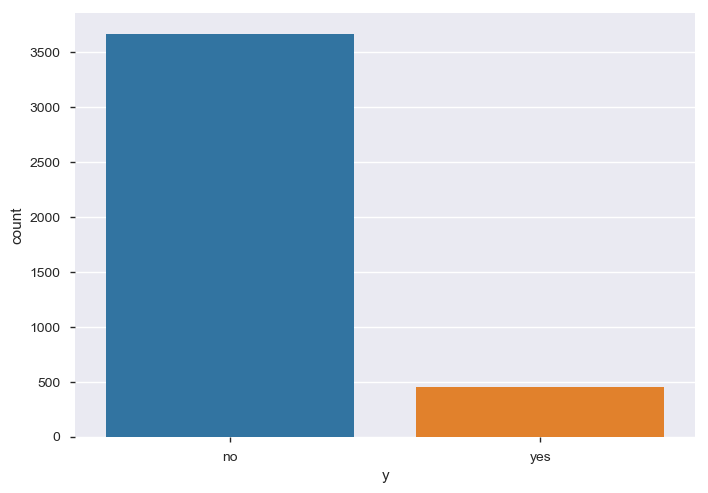

In [199]:
sns.countplot(x="y", data=data)
plt.show()


In [200]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
yes,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

#### Dropping the variables based on the data audit report (near zero variance, high missing, higly correlated variables, business logic)

In [201]:
data.drop(['euribor3m', 'nr.employed', 'default', 'pdays', 'cons.price.idx'], axis=1, inplace=True)

In [202]:
data.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.conf.idx', 'y'],
      dtype='object')

In [203]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,487,2,0,nonexistent,-1.8,-46.2,no
1,39,services,single,high.school,no,no,telephone,may,fri,346,4,0,nonexistent,1.1,-36.4,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,227,1,0,nonexistent,1.4,-41.8,no
3,38,services,married,basic.9y,unknown,unknown,telephone,jun,fri,17,3,0,nonexistent,1.4,-41.8,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,58,1,0,nonexistent,-0.1,-42.0,no


In [204]:
#Renaming the columsns by replacing special characters with underscore
data.columns = [ i.replace('.', '_') for i in data.columns]

In [205]:
#Missing value Treatment
data_cat = data[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']]
data_num = data[['age', 'campaign', 'previous', 'emp_var_rate','duration', 'cons_conf_idx']]

In [206]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [207]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,4119.0,0.0,165228.0,40.113620,38.0,10.313362,106.365426,18.0,24.0,26.0,28.8,32.0,38.0,47.0,55.0,58.0,68.00,88.0
campaign,4119.0,0.0,10451.0,2.537266,2.0,2.568159,6.595442,1.0,1.0,1.0,1.0,1.0,2.0,3.0,5.0,7.0,13.00,35.0
previous,4119.0,0.0,784.0,0.190337,0.0,0.541788,0.293535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.00,6.0
emp_var_rate,4119.0,0.0,350.0,0.084972,1.1,1.563114,2.443327,-3.4,-3.4,-2.9,-1.8,-1.8,1.1,1.4,1.4,1.4,1.40,1.4
duration,4119.0,0.0,1057710.0,256.788055,181.0,254.703736,64873.993194,0.0,11.0,35.0,60.0,103.0,181.0,317.0,545.2,740.2,1231.66,3643.0
cons_conf_idx,4119.0,0.0,-166815.8,-40.499102,-41.8,4.594578,21.110142,-50.8,-50.0,-47.1,-46.2,-42.7,-41.8,-36.4,-36.1,-33.6,-26.90,-26.9


In [208]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [209]:
cat_summary

,job,marital,education,housing,loan,contact,month,day_of_week,poutcome,y
N,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
NMISS,0,0,0,0,0,0,0,0,0,0
ColumnsNames,admin. 1012 blue-collar 884 te...,married 2509 single 1153 divorced ...,university.degree 1264 high.school ...,yes 2175 no 1839 unknown 10...,no 3349 yes 665 unknown 10...,cellular 2652 telephone 1467 Name: cont...,may 1378 jul 711 aug 636 jun 53...,thu 860 mon 855 tue 841 wed 795 fr...,nonexistent 3523 failure 454 succes...,"no 3668 yes 451 Name: y, dtype: int64"


In [210]:
#Handling Missings & Outliers

In [211]:
def missing_cat(x):
    t = x.value_counts()
    x[x=='unknown'] = t.index[0]
    return x

def missing_num(x):
    x[x==999] = np.nan
    x = x.fillna(x.median())
    return x

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [212]:
data_cat=data_cat.apply(missing_cat)
data_num=data_num.apply(missing_num)
data_num=data_num.apply(outlier_capping)

In [213]:
data_new = pd.concat([data_num, data_cat], axis=1)

## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [214]:
data_new = pd.get_dummies(data_new, data_cat.columns, drop_first=True)

In [215]:
data_new.head()

,age,campaign,previous,emp_var_rate,duration,cons_conf_idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,30.0,2.0,0.0,-1.8,487.0,-46.2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,39.0,4.0,0.0,1.1,346.0,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,25.0,1.0,0.0,1.4,227.0,-41.8,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,38.0,3.0,0.0,1.4,17.0,-41.8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,47.0,1.0,0.0,-0.1,58.0,-42.0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [216]:
#Renaming the columsns by replacing special characters with underscore
data_new.columns = [ i.replace('.', '_') for i in data_new.columns]
data_new.columns = [ i.replace('-', '_') for i in data_new.columns]

In [217]:
data_new.columns

Index(['age', 'campaign', 'previous', 'emp_var_rate', 'duration',
       'cons_conf_idx', 'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic_6y', 'education_basic_9y',
       'education_high_school', 'education_illiterate',
       'education_professional_course', 'education_university_degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [218]:
data_new.shape

(4119, 43)

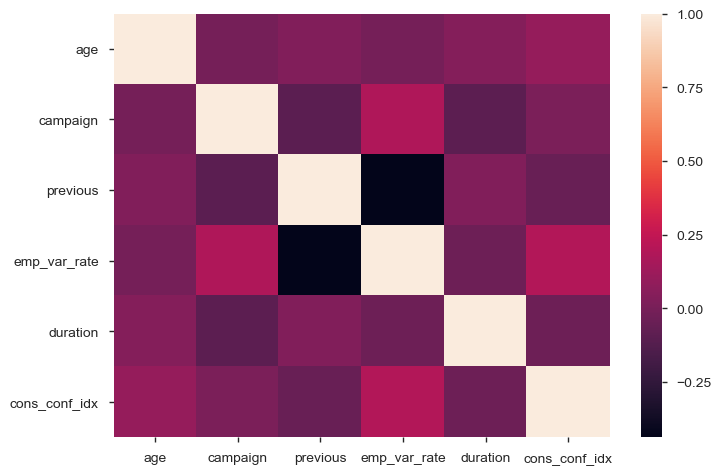

In [219]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_num.corr())

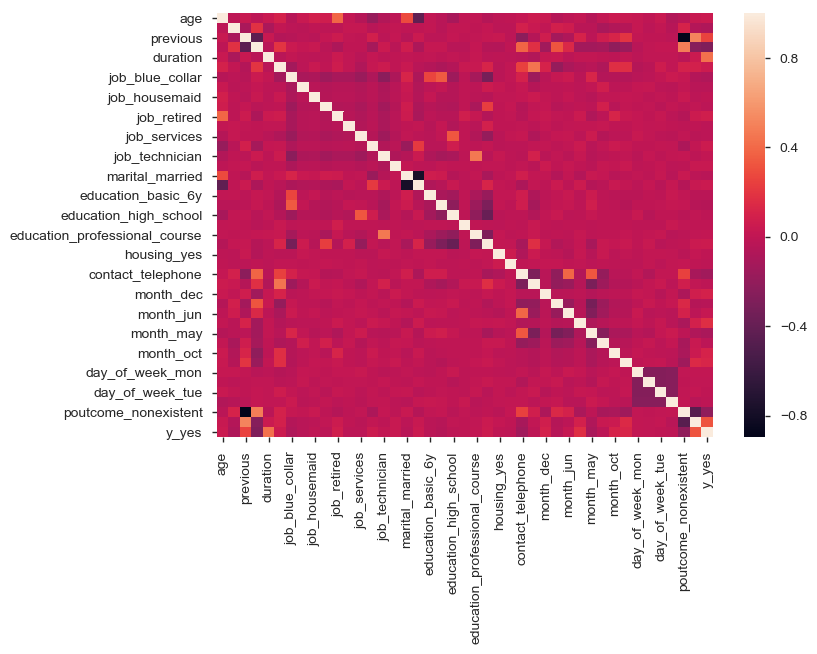

In [220]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data_new.corr())

In [221]:
corr = data_new.corr()
corr.to_csv('corr.csv')

### variable reduction (feature selection/reduction)

- Univariate Regression
- WOE - Binomial classification
- RFE
- SelectKBest
- VIF
- PCA

#### Univariate Regression

In [222]:
somersd_df = pd.DataFrame()
for num_variable in data_new.columns.difference(['y_yes']):
    result = smf.logit(formula = str('y_yes ~ ')+str(num_variable), data=data_new).fit()
    somers_d = 2*metrics.roc_auc_score(data_new.y_yes, result.predict()) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['VariableName', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.344178
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.341558
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343930
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.334952
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345418
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345447
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345451
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345421
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.277749
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.345048
  

In [223]:
imp_vars_SD = somersd_df.sort_values('SomersD', ascending=False).head(15)

In [224]:
imp_vars_SD

,VariableName,SomersD
0,duration,0.643665
0,emp_var_rate,0.412654
0,previous,0.243887
0,poutcome_nonexistent,0.233411
0,contact_telephone,0.210711
0,poutcome_success,0.19036
0,month_may,0.151588
0,campaign,0.107061
0,job_blue_collar,0.089118
0,cons_conf_idx,0.0857412


In [225]:
imp_vars_somerceD = list(imp_vars_SD.VariableName.values)

#### RFE

In [226]:
X = data_new[data_new.columns.difference(['y_yes'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier, 15)
rfe = rfe.fit(X, data_new[['y_yes']] )

In [227]:
imp_vars_RFE = list(X.columns[rfe.support_])

In [228]:
imp_vars_RFE

['age',
 'campaign',
 'cons_conf_idx',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'duration',
 'education_high_school',
 'emp_var_rate',
 'housing_yes',
 'job_technician',
 'loan_yes',
 'marital_single',
 'poutcome_success',
 'previous']

#### Select KBEST

In [229]:
X = data_new[data_new.columns.difference(['y_yes'])]
SKB = SelectKBest(f_classif, k=15).fit(X, data_new[['y_yes']] )

In [230]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [231]:
imp_vars_SKB

['campaign',
 'contact_telephone',
 'duration',
 'education_university_degree',
 'emp_var_rate',
 'job_blue_collar',
 'job_retired',
 'month_dec',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_nonexistent',
 'poutcome_success',
 'previous']

In [232]:
#Final List (from Univariate, RFE, SelectKbest)

In [233]:
Final_list = list(set(imp_vars_SKB + imp_vars_somerceD + imp_vars_RFE))

In [234]:
Final_list

['day_of_week_wed',
 'month_dec',
 'poutcome_success',
 'emp_var_rate',
 'marital_married',
 'age',
 'cons_conf_idx',
 'loan_yes',
 'contact_telephone',
 'job_technician',
 'previous',
 'job_retired',
 'education_university_degree',
 'education_basic_9y',
 'job_blue_collar',
 'day_of_week_tue',
 'day_of_week_thu',
 'month_sep',
 'duration',
 'housing_yes',
 'month_mar',
 'campaign',
 'education_high_school',
 'month_may',
 'poutcome_nonexistent',
 'marital_single',
 'month_oct']

In [235]:
X = data_new[Final_list]

In [236]:
X.head()

,day_of_week_wed,month_dec,poutcome_success,emp_var_rate,marital_married,age,cons_conf_idx,loan_yes,contact_telephone,job_technician,...,month_sep,duration,housing_yes,month_mar,campaign,education_high_school,month_may,poutcome_nonexistent,marital_single,month_oct
0,0,0,0,-1.8,1,30.0,-46.2,0,0,0,...,0,487.0,1,0,2.0,0,1,1,0,0
1,0,0,0,1.1,0,39.0,-36.4,0,1,0,...,0,346.0,0,0,4.0,1,1,1,1,0
2,1,0,0,1.4,1,25.0,-41.8,0,1,0,...,0,227.0,1,0,1.0,1,0,1,0,0
3,0,0,0,1.4,1,38.0,-41.8,0,1,0,...,0,17.0,1,0,3.0,0,0,1,0,0
4,0,0,0,-0.1,1,47.0,-42.0,0,0,0,...,0,58.0,1,0,1.0,0,0,1,0,0


#### Using WOE (Weight of Evidence)
- Identify important variables using WOE or log(odds) comparing with Y
- Variable Transformation: (i) Bucketing if the variables are not having linear relationship with log(odds)

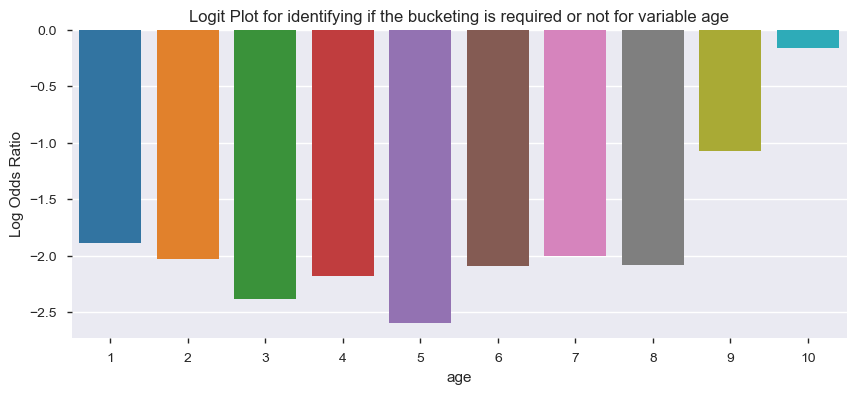

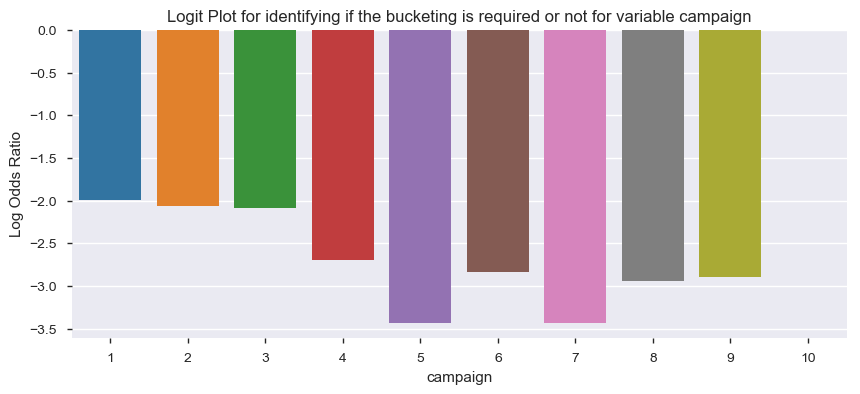

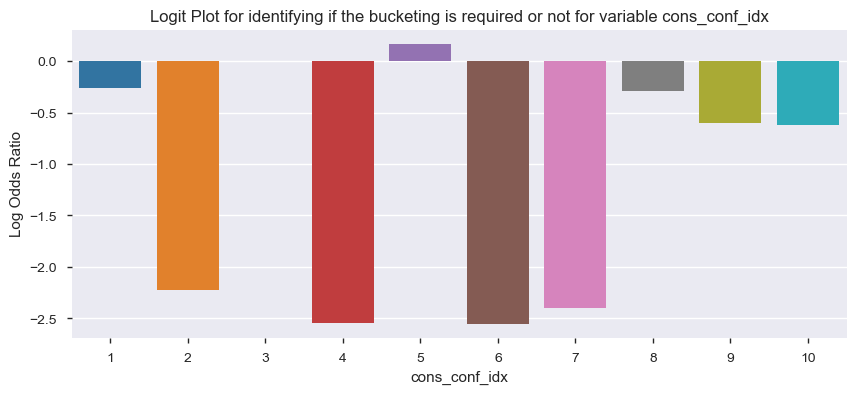

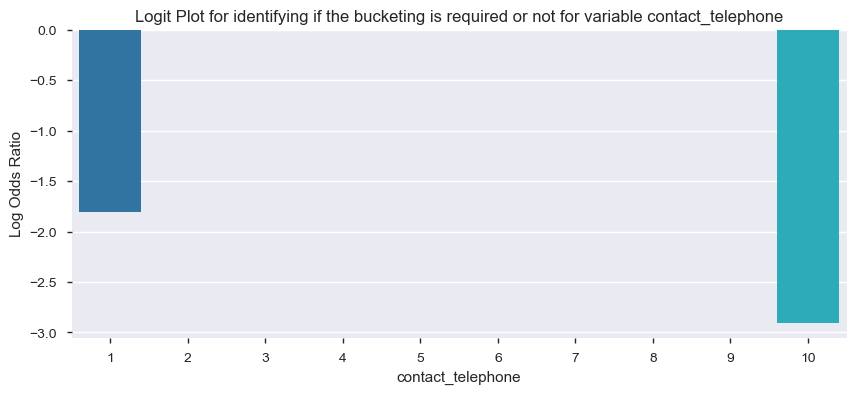

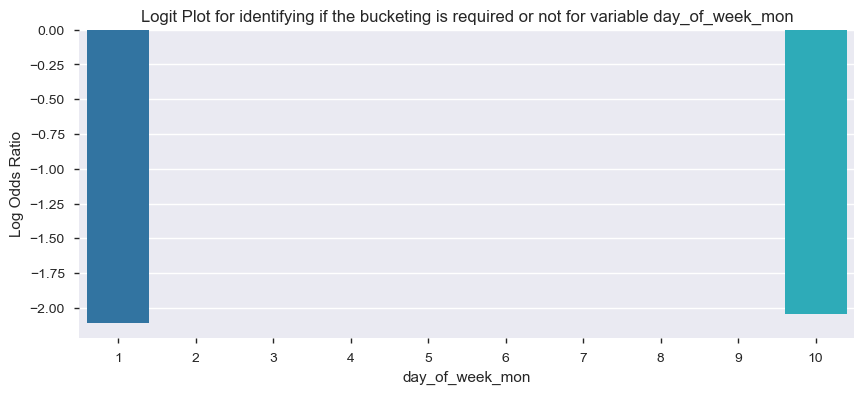

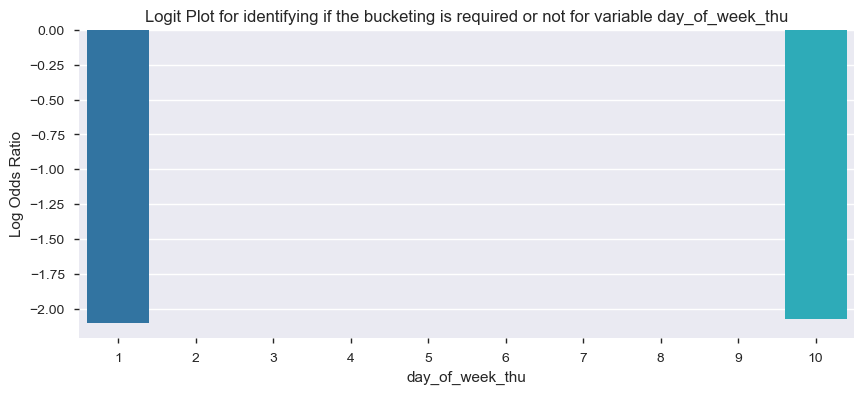

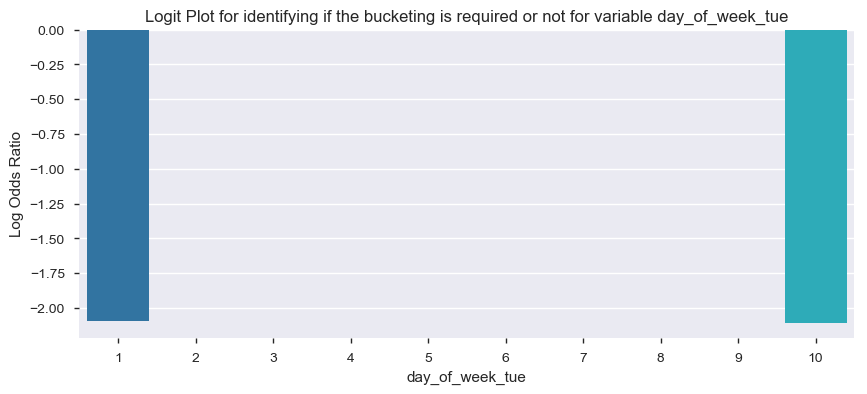

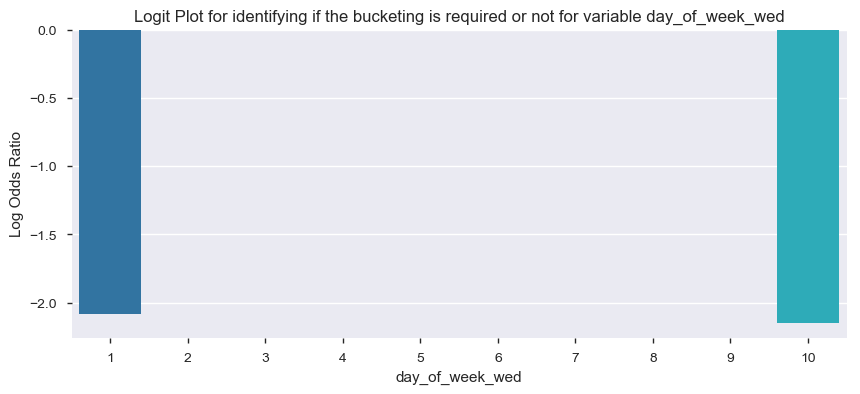

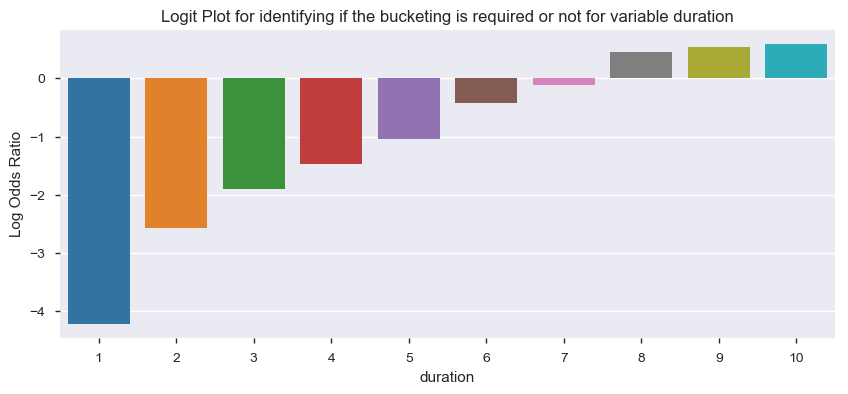

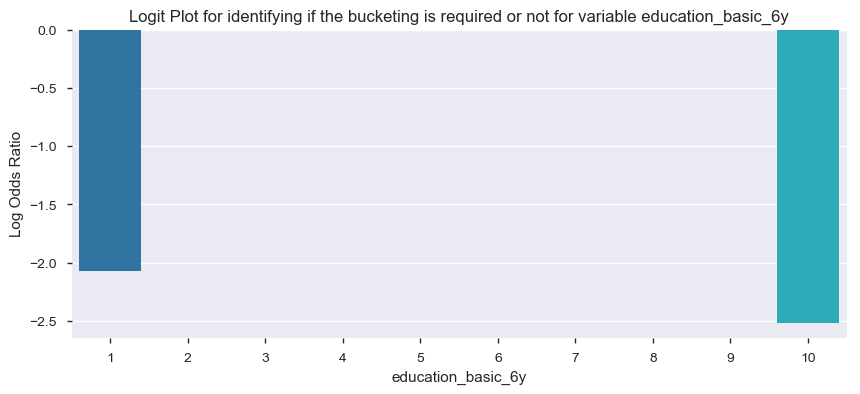

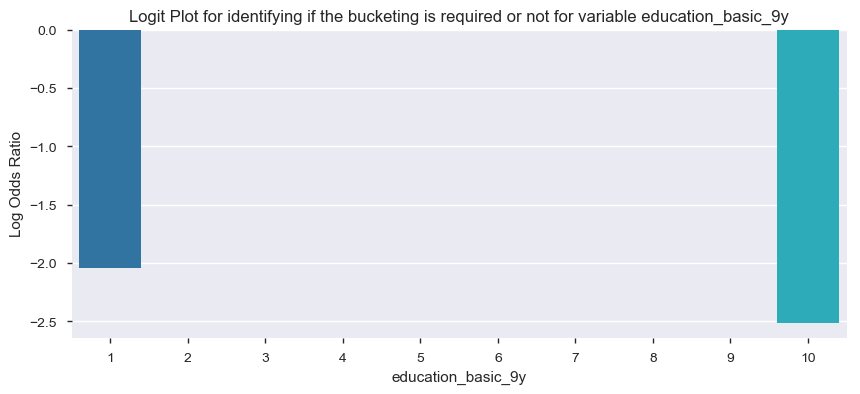

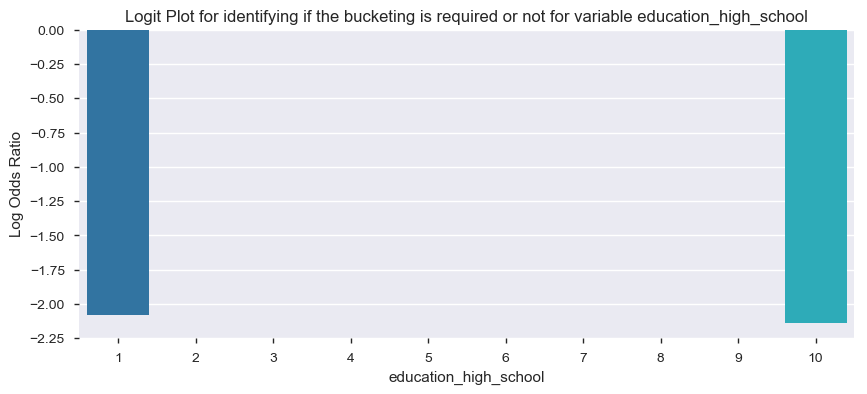

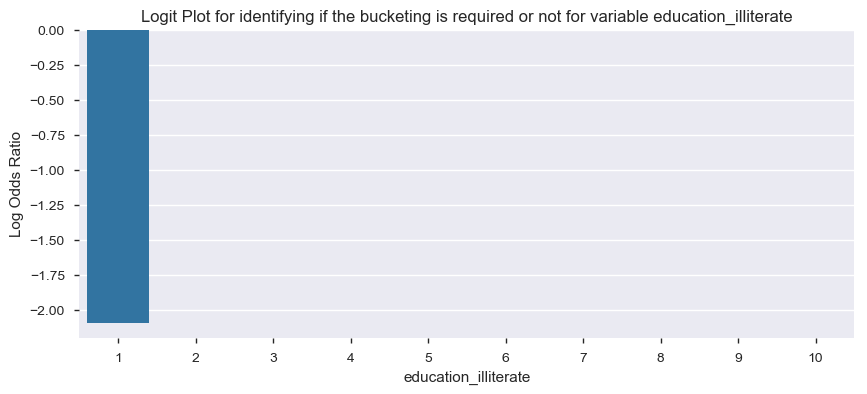

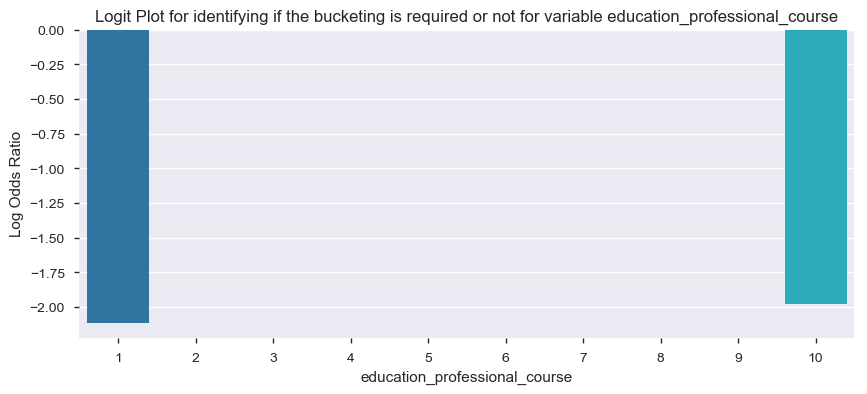

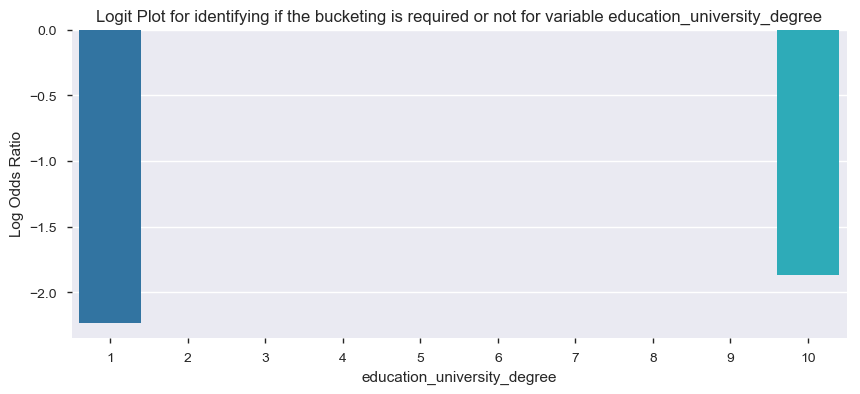

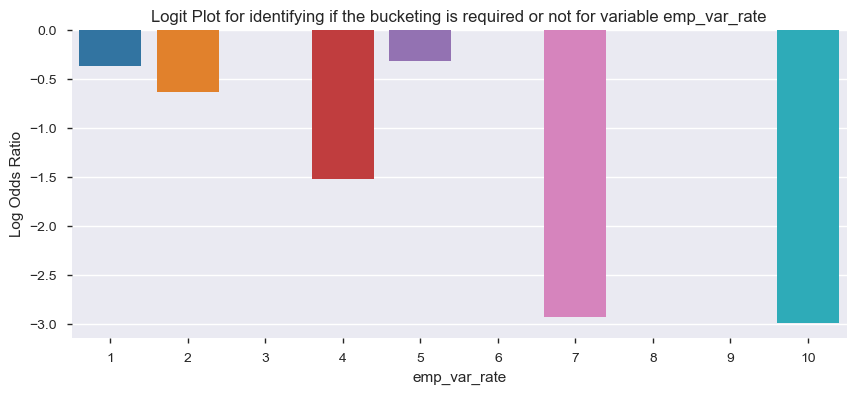

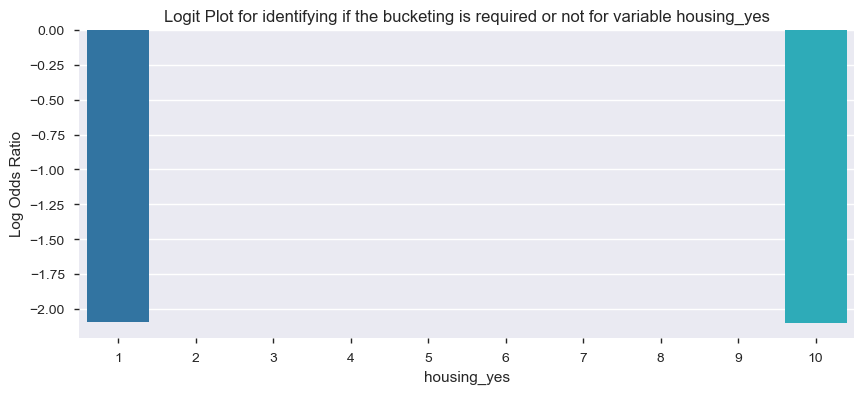

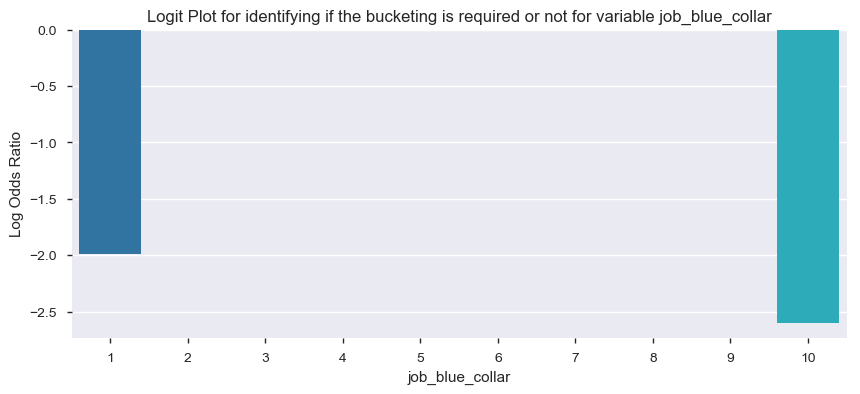

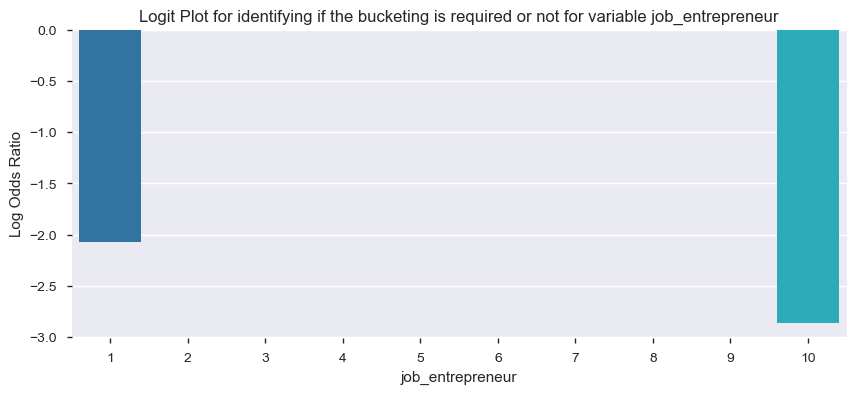

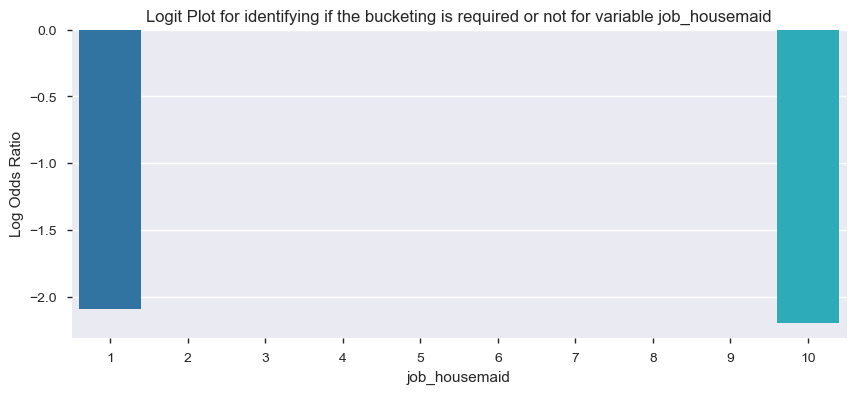

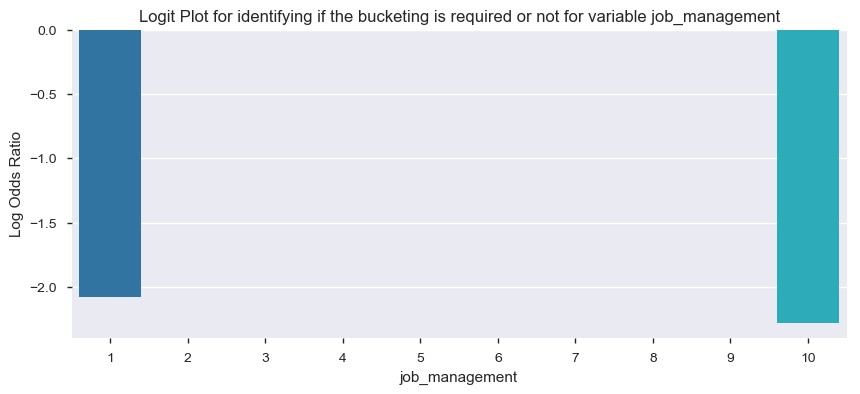

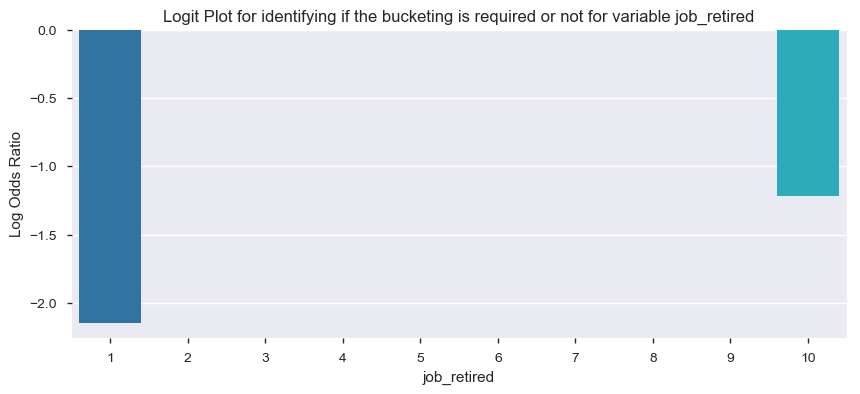

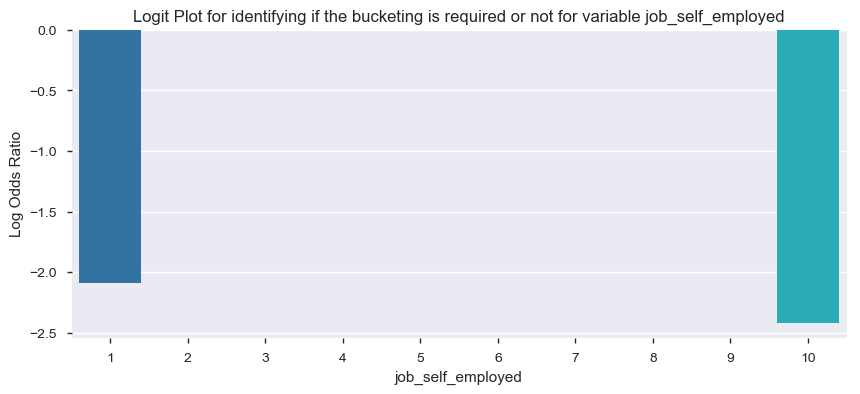

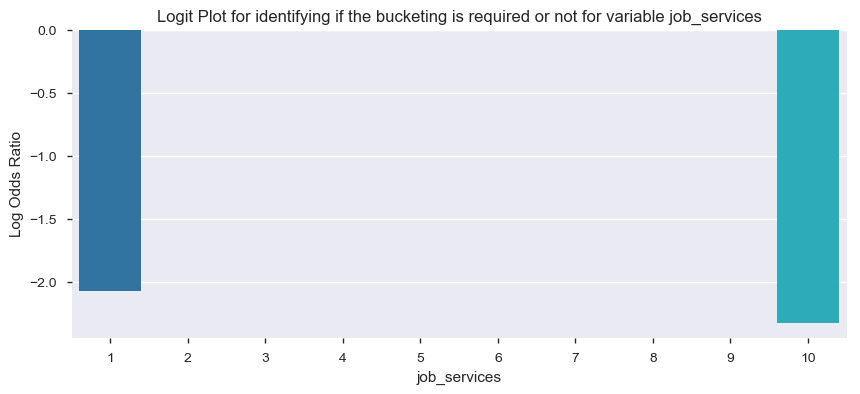

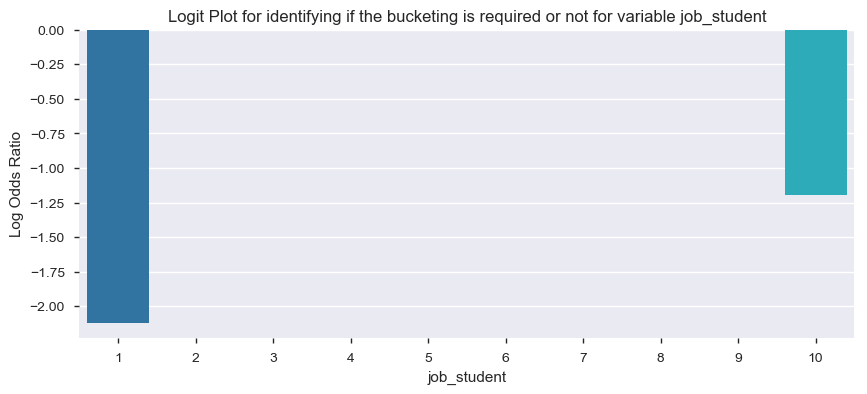

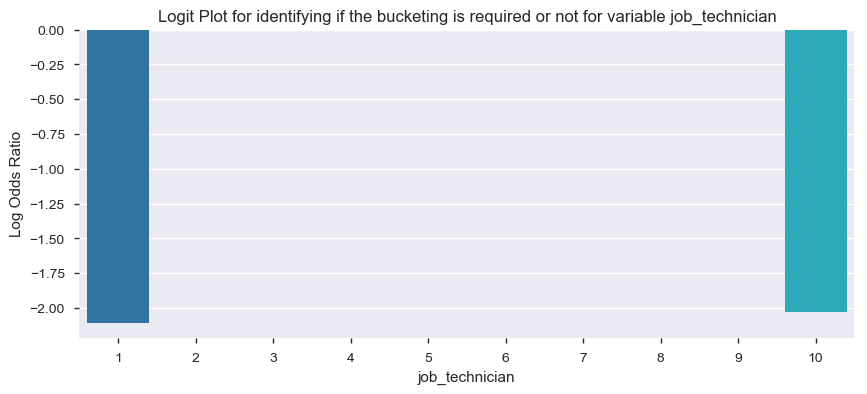

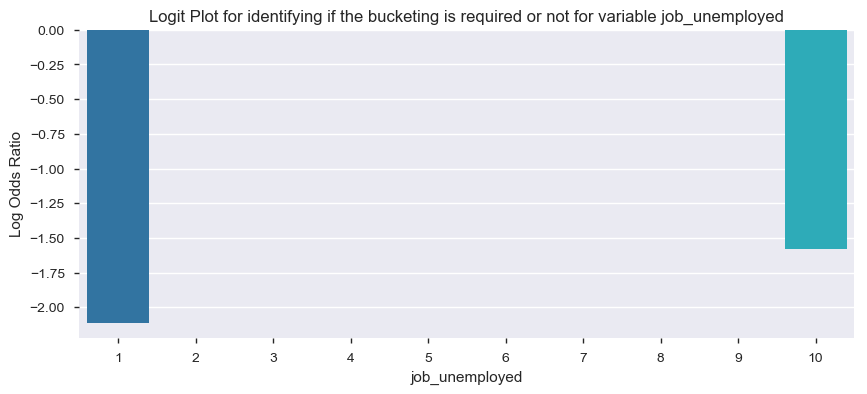

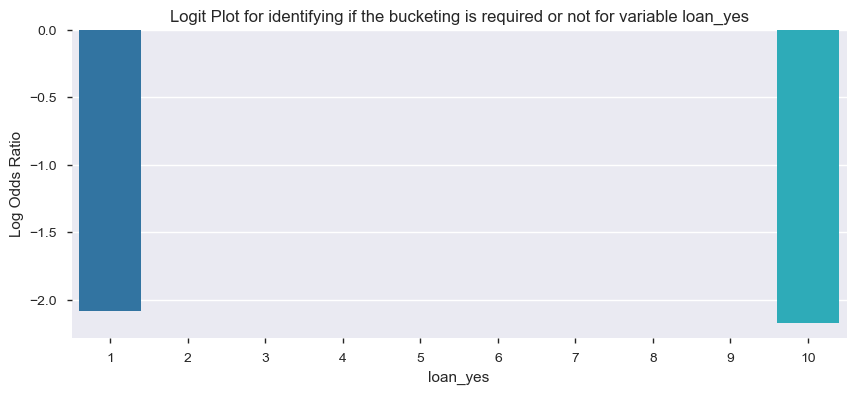

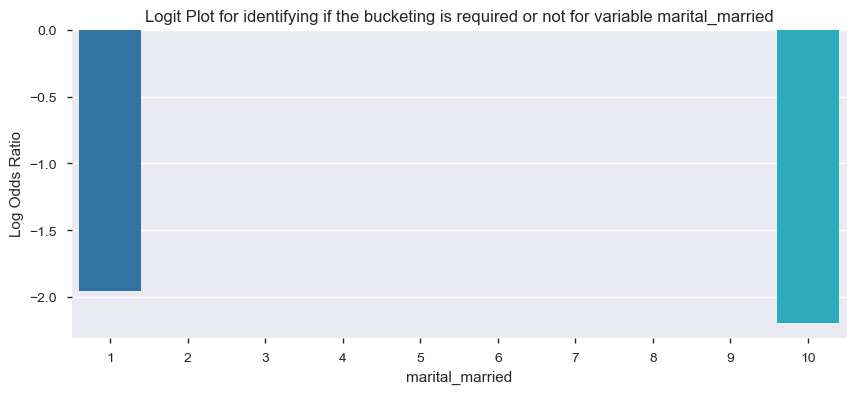

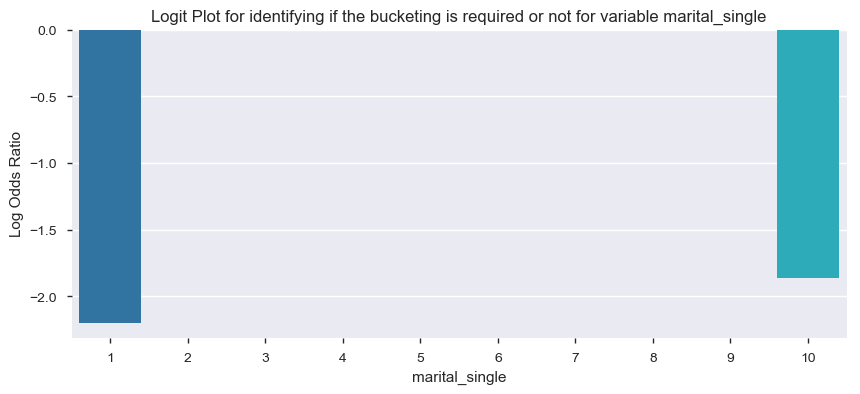

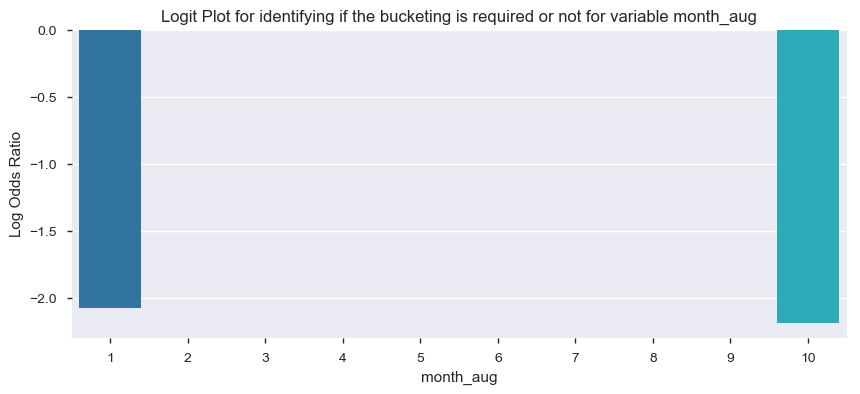

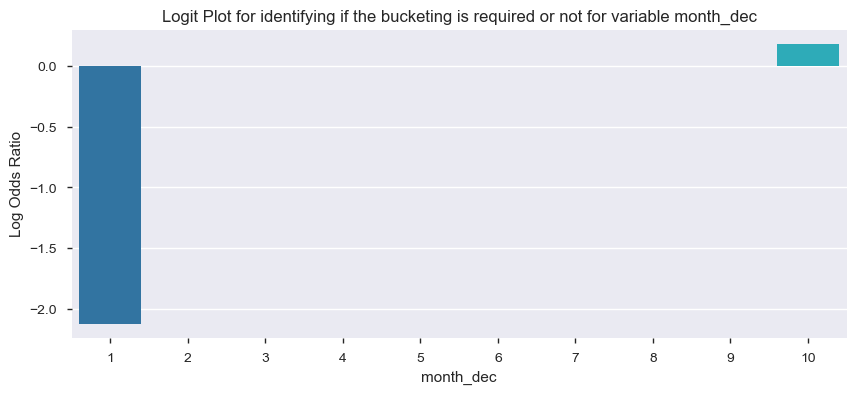

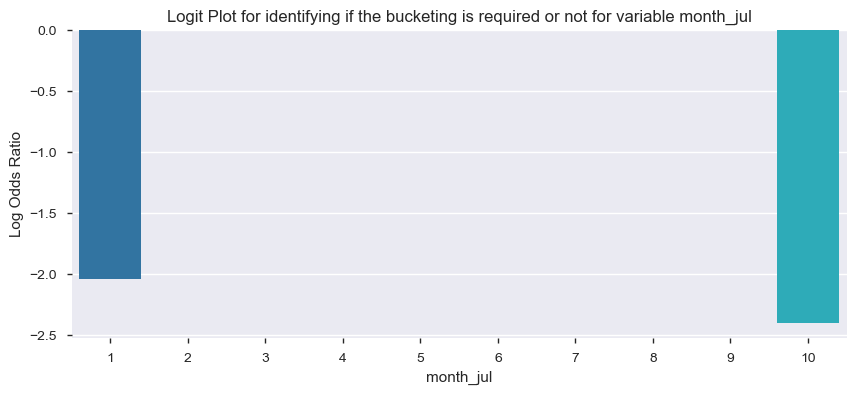

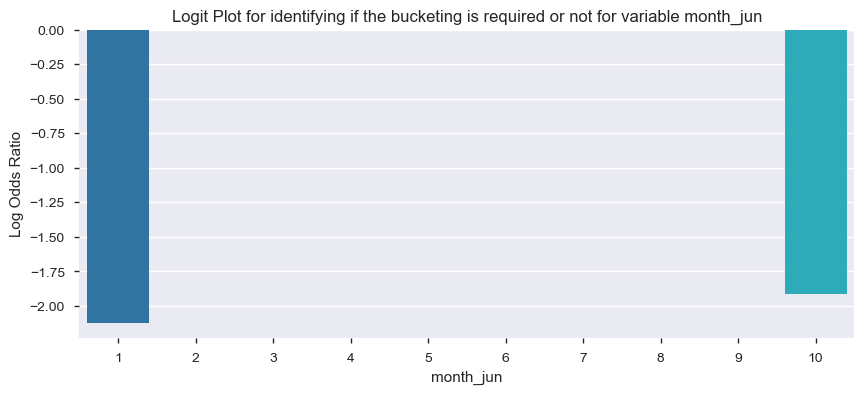

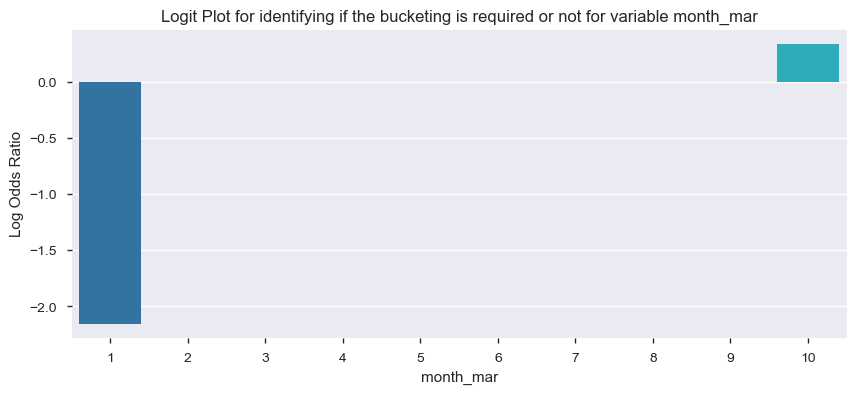

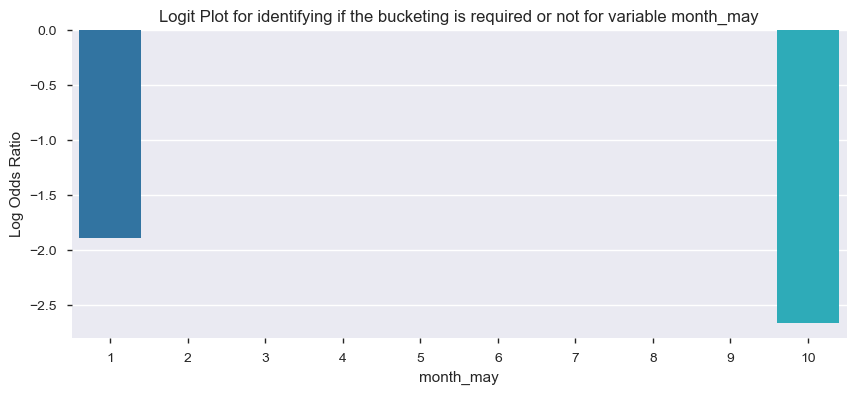

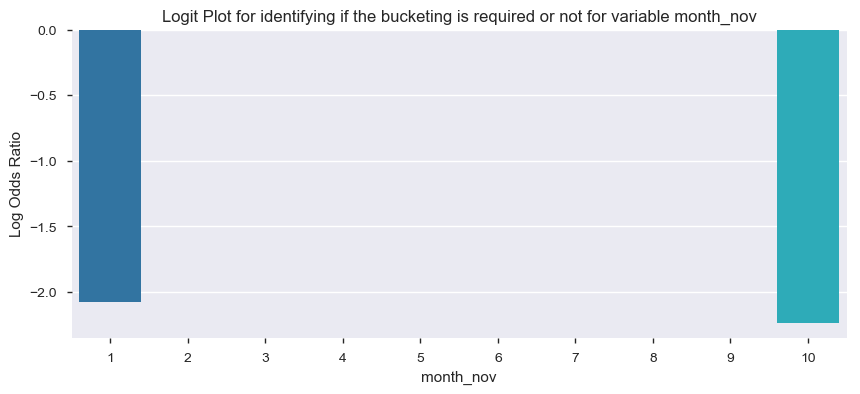

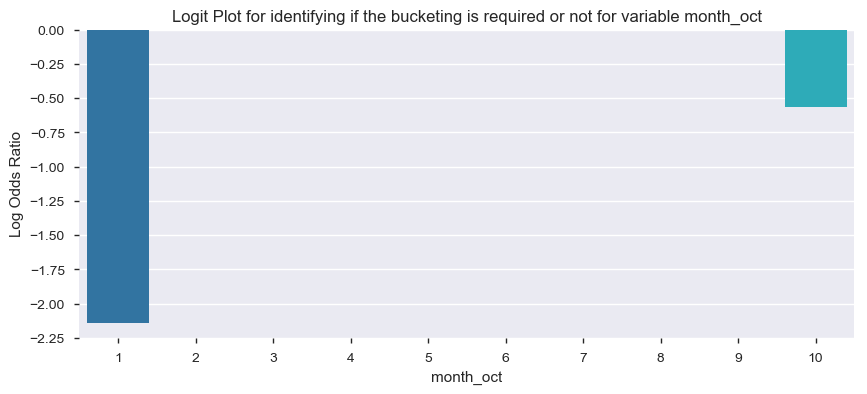

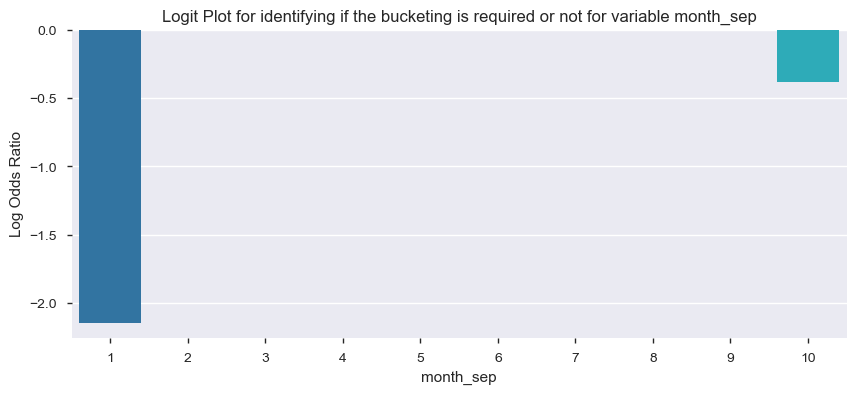

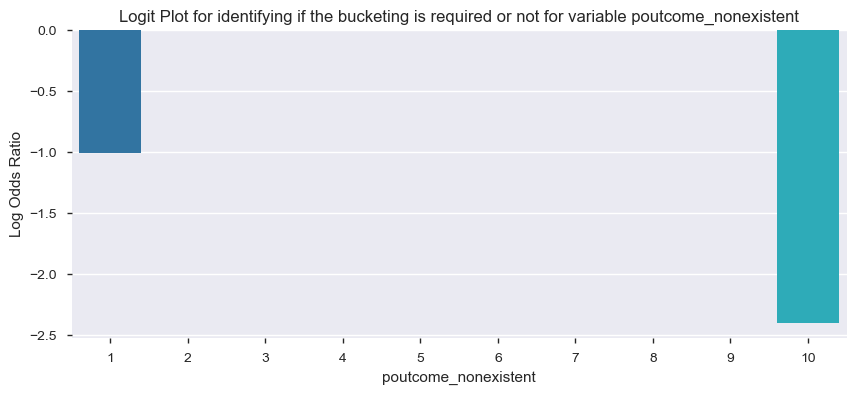

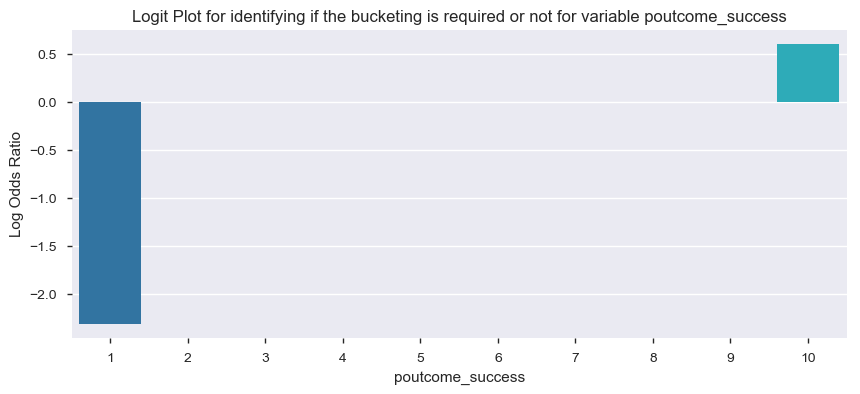

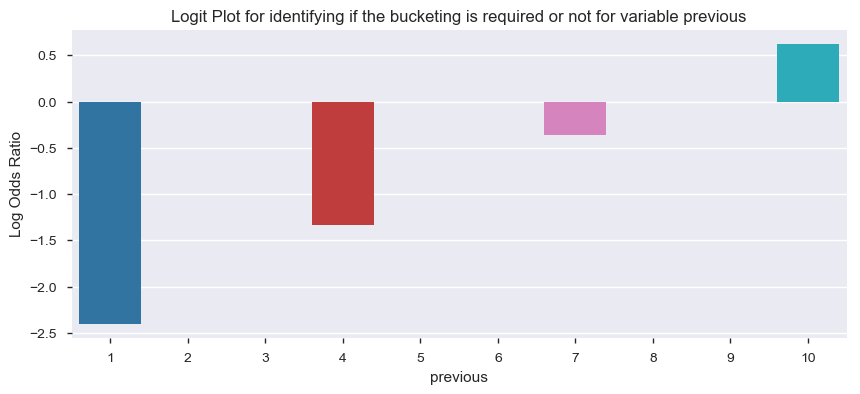

In [237]:
bp = PdfPages('WOE Plots.pdf')

for num_variable in data_new.columns.difference(['y_yes']):
    binned = pd.cut(data_new[num_variable], bins=10, labels=list(range(1,11)))
    #binned = binned.dropna()
    odds = data_new.groupby(binned)['y_yes'].sum() / (data_new.groupby(binned)['y_yes'].count()-data_new.groupby(binned)['y_yes'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=log_odds.index,y=log_odds)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()

In [238]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [239]:
for col in data_new.columns:
    if col == 'y_yes': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(data_new, col, 'y_yes')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: age
    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
40    5    3     2   64.0    0.000545   0.006652 -2.501400  0.015275
42    6    3     3   66.0    0.000818   0.006652 -2.095934  0.012228
24   45   22    23   68.0    0.006270   0.048780 -2.051483  0.087209
38    7    3     4   61.0    0.001091   0.006652 -1.808252  0.010056
43    5    2     3   62.0    0.000818   0.004435 -1.690469  0.006114
41    4    1     3   63.0    0.000818   0.002217 -0.997322  0.001396
39    4    1     3   67.0    0.000818   0.002217 -0.997322  0.001396
27   31    6    25   60.0    0.006816   0.013304 -0.668818  0.004339
15   85   14    71   50.0    0.019357   0.031042 -0.472312  0.005519
33   49    8    41   59.0    0.011178   0.017738 -0.461804  0.003030
37   62   10    52   26.0    0.014177   0.022173 -0.447276  0.003577
26   64   10    54   58.0    0.014722   0.022173 -0.409536  0.003051
20  170   25   145   33.0    0.039531   0.055432 -0.338077  0.005376
7   191

    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
1  3235  390  2845      0    0.775627   0.864745 -0.108763  0.009693
0   884   61   823      1    0.224373   0.135255  0.506148  0.045107
IV score: 0.05


WoE and IV for column: job_entrepreneur
    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
0  3971  443  3528      0    0.961832   0.982262 -0.021018  0.000429
1   148    8   140      1    0.038168   0.017738  0.766266  0.015655
IV score: 0.02


WoE and IV for column: job_housemaid
    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
0  4009  440  3569      0     0.97301    0.97561 -0.002668  0.000007
1   110   11    99      1     0.02699    0.02439  0.101290  0.000263
IV score: 0.00


WoE and IV for column: job_management
    All  Bad  Good  Value  Distr_Good  Distr_Bad       WoE        IV
0  3795  421  3374      0    0.919847   0.933481 -0.014713  0.000201
1   324   30   294      1    0.080153   0.066519  0.186448  0.002542
IV sco

    All  Bad  Good  Value  Distr_Good  Distr_Bad      WoE        IV
1   142   92    50      1    0.013631   0.203991 -2.70570  0.515056
0  3977  359  3618      0    0.986369   0.796009  0.21442  0.040817
IV score: 0.56




 You can select the variables based on the information value and below criteria
 
 - IV: <0.02, Predictive Power: Useless for prediction
 - IV: 0.02 - 0.1, Predictive Power: Weak predictor
 - IV: 0.1 - 0.2, Predictive Power: Medium predictor
 - IV: 0.3 - 0.5, Predictive Power: Storng predictor
 - IV: > 0.5, Predictive Power: Suspecious predictor or too good predictor

#### VIF Variance Inflation Factor

In [240]:
X_new =  X[X.columns.difference(['cons_conf_idx', 'age', 'poutcome_nonexistent'])]
#X_new =  X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

print(vif)

    VIF Factor                     features
0     2.176814                     campaign
1     2.276675            contact_telephone
2     1.473632              day_of_week_thu
3     1.463771              day_of_week_tue
4     1.451193              day_of_week_wed
5     2.082953                     duration
6     1.493618           education_basic_9y
7     1.766268        education_high_school
8     2.280263  education_university_degree
9     1.772731                 emp_var_rate
10    2.123565                  housing_yes
11    1.757767              job_blue_collar
12    1.121466                  job_retired
13    1.334985               job_technician
14    1.188222                     loan_yes
15    4.289231              marital_married
16    2.635773               marital_single
17    1.047851                    month_dec
18    1.059406                    month_mar
19    2.024643                    month_may
20    1.125741                    month_oct
21    1.108353                  

### Splitting the data into train & test 

In [241]:
target = data_new[['y_yes']]
features = X_new

In [242]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [243]:
#for logistic regression using statsmodels
train, test = train_test_split(data_new, test_size=0.3, random_state=0)

### Logistic Regression Using Stats Models (Traiditional Approach)

In [244]:
logreg = smf.logit(formula='y_yes~campaign+cons_conf_idx+contact_telephone+duration+emp_var_rate+job_blue_collar+job_entrepreneur+job_management+job_retired+job_self_employed+job_student+month_dec+month_jun+month_mar+month_may+month_nov+month_oct+month_sep+poutcome_success+previous', data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.187058
         Iterations 8


In [245]:
print(result.summary2())

                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.473      
Dependent Variable: y_yes            AIC:              1120.5783  
Date:               2019-11-24 14:14 BIC:              1245.8766  
No. Observations:   2883             Log-Likelihood:   -539.29    
Df Model:           20               LL-Null:          -1023.6    
Df Residuals:       2862             LLR p-value:      1.9592e-192
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -2.4205   0.7155 -3.3828 0.0007 -3.8230 -1.0181
campaign           -0.0781   0.0536 -1.4568 0.1452 -0.1832  0.0270
cons_conf_idx       0.0465   0.0169  2.7514 0.0059  0.0134  0.0797
contact_telephone  -0

In [246]:
logreg = smf.logit(formula='y_yes~cons_conf_idx+contact_telephone+duration+emp_var_rate+job_self_employed+month_jun+month_mar+month_may+month_nov+poutcome_success+previous', data=train)
result = logreg.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.189120
         Iterations 8
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.467      
Dependent Variable: y_yes            AIC:              1114.4674  
Date:               2019-11-24 14:14 BIC:              1186.0664  
No. Observations:   2883             Log-Likelihood:   -545.23    
Df Model:           11               LL-Null:          -1023.6    
Df Residuals:       2871             LLR p-value:      4.0137e-198
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -2.0412   0.6562  -3.1107 0.0019 -3.3274 -0.7551
cons_conf_idx      0.0593   0.0160   3.7052 0.0002  0

### Accuracy Metrics

In [247]:
train_gini = 2*metrics.roc_auc_score(train['y_yes'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['y_yes'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['y_yes'], result.predict(train))
test_auc = metrics.roc_auc_score(test['y_yes'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.8885436278511802
The Gini Index for the model built on the Test Data is :  0.818325632045207
The AUC for the model built on the Train Data is :  0.9442718139255901
The AUC for the model built on the Test Data is :  0.9091628160226035


In [248]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['y_yes']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
4070,0,0.009942
1240,0,0.009801
349,0,0.005759
3706,0,0.019382
4043,0,0.006265


In [249]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['y_yes']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
3754,0,0.007338
45,0,0.112076
2774,0,0.052020
1170,0,0.078342
4042,0,0.025989


In [250]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [251]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.114117
0,0.020408,0.993921,0.586922,0.633368
0,0.040816,0.975684,0.746672,0.772806
0,0.061224,0.951368,0.797964,0.815470
0,0.081633,0.911854,0.829287,0.838710


In [252]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [253]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.114117,1.000000
0,0.020408,0.993921,0.586922,0.633368,1.580843
0,0.040816,0.975684,0.746672,0.772806,1.722356
0,0.061224,0.951368,0.797964,0.815470,1.749332
0,0.081633,0.911854,0.829287,0.838710,1.741141


In [254]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.102041,0.899696,0.855129,0.860215,1.754825


In [255]:
#Cut-off based on highest accuracy   - some teams use this as methodology to decide the cut-off
roc_like_df[roc_like_df['accuracy']==roc_like_df['accuracy'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.428571,0.56535,0.966327,0.920569,1.531677


In [256]:
#Cut-off based on highest sensitivity
roc_like_df[roc_like_df['sensitivity']==roc_like_df['sensitivity'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.0,1.0,0.0,0.114117,1.0


In [257]:
#Choosen Best Cut-off is 0.23 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.1020 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.1020 else 0)

In [258]:
train_predict.head()

,actual,prob,predicted
4070,0,0.009942,0
1240,0,0.009801,0
349,0,0.005759,0
3706,0,0.019382,0
4043,0,0.006265,0


In [259]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.8602150537634409
The overall accuracy score for the Test Data  is :  0.8292880258899676


In [260]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      2554
           1       0.44      0.90      0.59       329

    accuracy                           0.86      2883
   macro avg       0.71      0.88      0.76      2883
weighted avg       0.92      0.86      0.88      2883



In [261]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1114
           1       0.34      0.80      0.48       122

    accuracy                           0.83      1236
   macro avg       0.66      0.82      0.69      1236
weighted avg       0.91      0.83      0.86      1236



In [262]:
### Decile Analysis

#Decile analysis
#Top-two deciles - High risk customers - will reject applications
#3rd,4th, 5th deciesl - medium risk customers - will accept application with proper scrutin
#6th decile onwards - low risk customers - accept the applications


#Decile analysis for validation of models - Business validation

In [263]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

train_predict.head()

,actual,prob,predicted,Deciles
4070,0,0.009942,0,2
1240,0,0.009801,0,2
349,0,0.005759,0,1
3706,0,0.019382,0,5
4043,0,0.006265,0,1


In [264]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

,actual,prob,predicted,Deciles
3754,0,0.007338,0,2
45,0,0.112076,1,7
2774,0,0.052020,0,6
1170,0,0.078342,0,7
4042,0,0.025989,0,5


In [265]:
# Decile Analysis for train data

no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [266]:
Decile_analysis_train = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_train

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.998861,0.395591,189,100,289
8,0.394798,0.146594,92,196,288
7,0.144888,0.055165,36,252,288
6,0.054922,0.028528,7,281,288
5,0.028468,0.018723,3,285,288
4,0.018677,0.013422,1,288,289
3,0.013388,0.010158,1,279,280
2,0.010133,0.007247,0,295,295
1,0.007229,0.004284,0,288,288


In [267]:
# Decile Analysis for train data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([max_prob, min_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test

,prob,prob,actual,actual,actual
Deciles,,,,,
9,0.997773,0.343355,61,63,124
8,0.341610,0.145689,33,90,123
7,0.144888,0.054102,18,106,124
6,0.053850,0.029843,7,116,123
5,0.029707,0.019498,1,123,124
4,0.019489,0.013224,2,121,123
3,0.013218,0.009621,0,123,123
2,0.009584,0.006636,0,124,124
1,0.006626,0.003781,0,124,124


In [268]:
Decile_analysis_train.to_csv('Decile_analysis_train.csv')

Decile_analysis_test.to_csv('Decile_analysis_test.csv')

#Exercise
#you need to come up with the similar metrics for train & test as per the template
# you need to compare Bad rate, lift, KS, Rank ordering for train & test decile analysis

### Logistic Regression using sklearn

In [269]:
#Build the model
model = LogisticRegression()
model = model.fit(train_X, train_y)

In [270]:
train_X['pred_prob'] = pd.DataFrame(model.predict_proba(train_X), index=train_X.index)[1]

In [271]:
test_X['pred_prob'] = pd.DataFrame(model.predict_proba(test_X),index=test_X.index)[1]

In [272]:
train = pd.concat([train_X, train_y], axis=1)

In [273]:
test = pd.concat([test_X, test_y], axis=1)

In [274]:
train['pred'] = np.where(train.pred_prob>0.1065, 1,0)
test['pred'] = np.where(test.pred_prob>0.1065, 1,0)

In [275]:
train.head()

,campaign,contact_telephone,day_of_week_thu,day_of_week_tue,day_of_week_wed,duration,education_basic_9y,education_high_school,education_university_degree,emp_var_rate,...,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,previous,pred_prob,y_yes,pred
929,2.0,1,1,0,0,142.0,1,0,0,1.4,...,0,0,0,0,0,0,0.0,0.009014,0,0
776,2.0,0,1,0,0,281.0,0,0,1,-0.1,...,0,0,0,0,0,0,0.0,0.091904,0,0
2469,2.0,0,0,0,0,111.0,0,1,0,-1.8,...,0,0,1,0,0,0,0.0,0.031688,0,0
3645,1.0,0,1,0,0,578.0,0,0,0,-1.8,...,0,0,1,0,0,0,0.0,0.329974,1,1
103,1.0,0,0,0,0,191.0,0,0,1,-1.8,...,0,0,1,0,0,0,0.0,0.063214,0,0


In [276]:
test.head()

,campaign,contact_telephone,day_of_week_thu,day_of_week_tue,day_of_week_wed,duration,education_basic_9y,education_high_school,education_university_degree,emp_var_rate,...,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_success,previous,pred_prob,y_yes,pred
2314,1.0,0,0,0,0,80.0,0,0,0,-0.1,...,0,0,0,0,0,0,1.0,0.020512,0,0
1683,2.0,0,0,1,0,75.0,1,0,0,-3.4,...,0,0,0,1,0,0,1.0,0.120699,0,1
2164,2.0,0,0,0,0,322.0,1,0,0,-0.1,...,0,0,0,0,0,0,0.0,0.053048,0,0
3684,6.0,1,0,1,0,166.0,0,1,0,1.4,...,0,0,0,0,0,0,0.0,0.007127,0,0
3692,2.0,1,0,0,0,181.0,0,0,0,1.1,...,0,0,1,0,0,0,0.0,0.006566,0,0


In [277]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train.y_yes, train.pred)
print(confusion_matrix)

[[2155  421]
 [  33  274]]


In [278]:
print(metrics.classification_report(train.y_yes, train.pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      2576
           1       0.39      0.89      0.55       307

    accuracy                           0.84      2883
   macro avg       0.69      0.86      0.73      2883
weighted avg       0.92      0.84      0.87      2883



In [279]:
print(metrics.classification_report(test.y_yes, test.pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1092
           1       0.44      0.89      0.59       144

    accuracy                           0.85      1236
   macro avg       0.71      0.87      0.75      1236
weighted avg       0.92      0.85      0.87      1236



#### Performing logistic Regression using K-Fold validation manually

In [280]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, train_X, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.910


In [281]:
results

array([0.89965398, 0.89619377, 0.91695502, 0.94444444, 0.89930556,
       0.90625   , 0.89583333, 0.91319444, 0.93402778, 0.89583333])

### K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [282]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [283]:
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )

In [284]:
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [285]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

In [286]:
model.best_score_

0.8988251406227099

In [287]:
train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [288]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00       307

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883



In [289]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1092
           1       0.67      0.31      0.43       144

    accuracy                           0.90      1236
   macro avg       0.79      0.65      0.69      1236
weighted avg       0.89      0.90      0.89      1236



###  Decision Trees

##### Important Tuning Parameters for DT: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.

#### Fine Tuning the parameters

In [290]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [293]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])},
             pre_dispatch=

In [294]:
tree.best_score_

0.9025320846340618

In [295]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [296]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [297]:
train_pred = tree.predict(train_X)

In [298]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2576
           1       0.69      0.27      0.39       307

    accuracy                           0.91      2883
   macro avg       0.81      0.63      0.67      2883
weighted avg       0.89      0.91      0.89      2883



In [299]:
test_pred = tree.predict(test_X)

In [300]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1092
           1       0.58      0.24      0.34       144

    accuracy                           0.89      1236
   macro avg       0.75      0.61      0.64      1236
weighted avg       0.87      0.89      0.87      1236



### Building Final Decision Tree Model

In [301]:
train_X = train_X[train_X.columns.difference(['pred_prob'])]

In [302]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=4, max_leaf_nodes=5 )
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Relative Importance of Features

In [303]:
clf_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.78528232, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07496243, 0.13975525, 0.        ])

In [304]:
# summarize the selection of the attributes
import itertools
feature_map = [(i, v) for i, v in itertools.zip_longest(train_X.columns, clf_tree.feature_importances_)]

feature_map

[('campaign', 0.0),
 ('contact_telephone', 0.0),
 ('day_of_week_thu', 0.0),
 ('day_of_week_tue', 0.0),
 ('day_of_week_wed', 0.0),
 ('duration', 0.7852823198198227),
 ('education_basic_9y', 0.0),
 ('education_high_school', 0.0),
 ('education_university_degree', 0.0),
 ('emp_var_rate', 0.0),
 ('housing_yes', 0.0),
 ('job_blue_collar', 0.0),
 ('job_retired', 0.0),
 ('job_technician', 0.0),
 ('loan_yes', 0.0),
 ('marital_married', 0.0),
 ('marital_single', 0.0),
 ('month_dec', 0.0),
 ('month_mar', 0.0),
 ('month_may', 0.0),
 ('month_oct', 0.0),
 ('month_sep', 0.07496243358177547),
 ('poutcome_success', 0.13975524659840188),
 ('previous', 0.0)]

In [305]:
Feature_importance = pd.DataFrame(feature_map, columns=['Feature', 'importance'])
Feature_importance.sort_values('importance', inplace=True, ascending=False)
Feature_importance.head(10)

,Feature,importance
5,duration,0.785282
22,poutcome_success,0.139755
21,month_sep,0.074962
0,campaign,0.000000
13,job_technician,0.000000
20,month_oct,0.000000
19,month_may,0.000000
18,month_mar,0.000000
17,month_dec,0.000000
16,marital_single,0.000000


### Generate Rules from Decision Trees

#### To create a decision tree visualization graph.
- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus
- Add the path to environmental variables
- Note: The notebook needs a restart.

In [306]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [307]:
# Exporting the tree output in the form opendocument
export_graphviz( clf_tree,
              out_file = "bank_tree.odt",
              feature_names = train_X.columns )

In [308]:
# Converting open document file to jpg imanage

import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'bank_tree.odt' )

In [309]:
chd_tree_graph.write_jpg( 'bank_tree.jpg' )

True

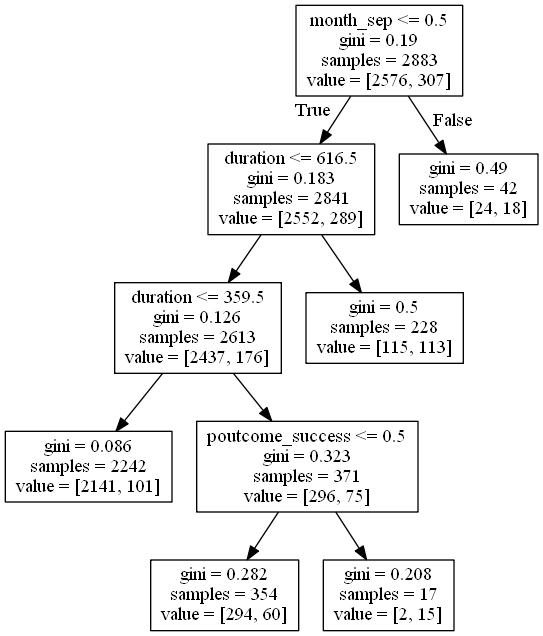

In [310]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='bank_tree.jpg')

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

### Tuning parameters

In [ ]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
gscv_results = gscv_bagging.fit(train_X, train_y)

In [ ]:
gscv_results.best_params_

In [ ]:
gscv_results.best_params_

In [ ]:
gscv_results.best_score_

## Random Forest

##### Important Tuning Parameters for Random Forest: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split

In [311]:
from sklearn.ensemble import RandomForestClassifier

radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=6, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

### Feature importance from the Random Forest Model

In [312]:
radm_clf.feature_importances_

indices = np.argsort(radm_clf.feature_importances_)[::-1]

In [313]:
import seaborn as sn

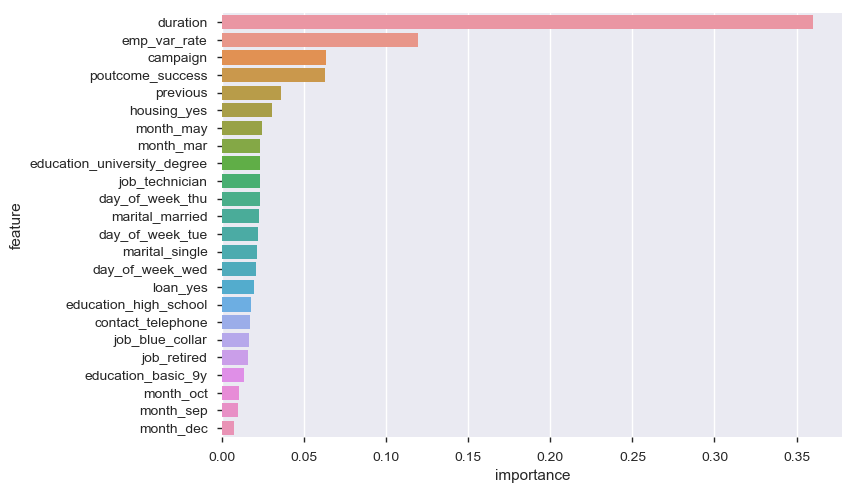

In [314]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

### Tuning parameters

In [335]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [336]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   40.8s finished


0.9136316337148803

In [337]:
gscv_results.best_params_

{'max_features': 12, 'n_estimators': 70}

In [338]:
gscv_results.predict(train_X)

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [339]:
import pickle

In [343]:
# now you can save it to a file
with open('RF_Model.pkl', 'wb') as f:
    pickle.dump(gscv_results, f)

### Boosting

#### Ada Boosting

In [ ]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [ ]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [ ]:
gscv_ada.fit(train_X, train_y)

In [ ]:
gscv_ada.best_params_

In [ ]:
clf_ada = gscv_ada.best_estimator_

In [ ]:
gscv_ada.best_score_

In [ ]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=800)
ad.fit(train_X, train_y )

In [ ]:
print(pd.Series(cross_val_score(clf_ada, train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

### Gradient Boost

##### Important Tuning Parameters for GBM: 
- learning_rate - the effect of each tree on the outcome is shrunk by this factor.
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split

In [ ]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(train_X, train_y)

In [ ]:
gscv_gbm.best_params_

In [ ]:
clf_gbm = gscv_gbm.best_estimator_

gscv_gbm.best_score_

In [ ]:
gbm=GradientBoostingClassifier(learning_rate = 0.1, n_estimators=800)
gbm.fit(train_X, train_y )

In [ ]:
print(pd.Series(cross_val_score(clf_gbm, train_X, train_y, cv=10)).describe()[['min', 'mean', 'max']])

### XGBOOST

##### Important Tuning Parameters for XGBOOST: 
- learning_rate - Boosting Learning rate.
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split
- gamma - Minimum loss reduction required to make a further partition on a leaf node of the tree.
- subsample - Denotes the fraction of observations to be randomly samples for each tree.
- colsample_bytree - It is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
- reg_alpa - L1 regularization term on weights. Increasing this value will make model more conservative. 
- reg_lambda - L2 regularization term on weights. Increasing this value will make model more conservative.
- scale_pos_weight - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).

In [ ]:
from xgboost import XGBClassifier

In [ ]:
XGBClassifier?

In [ ]:
#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)


In [ ]:
test_X = test_X[test_X.columns.difference(['pred_prob'])]

In [ ]:
xgb_estimator.fit(train_X, train_y)

In [ ]:
xgb_estimator.predict(train_X)

In [ ]:
metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1])

In [ ]:
metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1])

In [ ]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

In [ ]:
# with all tuning parameters

In [ ]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [ ]:
xgb_estimator.fit(train_X, train_y)

In [ ]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

In [ ]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))

#### Naive Bayes

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

In [ ]:
metrics.confusion_matrix( test_y,nb_clf.predict( test_X) )

In [ ]:
metrics.accuracy_score( test_y, nb_clf.predict( test_X ) )

## Support Vector Machines (SVC)

##### Important Tuning Parameters for Support Vector Classifier: 
- C - C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly
- class_weight - Weights associated with classes in the form class_label : Weight. If not given, all classes are supposed to have weight one.
- degree - degree is a parameter used when kernel is set to poly. It’s basically the degree of the polynomial used to find the hyperplane to split the data.
- gamma - kernel coefficient for rbf, ploy and sigmoid to handle non-linear classification
- kernel - This selects the type of hyperplane used to separate the data.
- tol - tolerance for stopping criterion.

In [ ]:
model = SVC(kernel='rbf', class_weight='balanced')

In [ ]:
model.fit(train_X, train_y)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X, train_y)

In [ ]:
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

## Artificial Neural Networks (ANN) using sklearn

##### Important Tuning Parameters for ANN using SKLearn: 
- hidden_layer_size - The number of neurons in the hidden layer.
- learning_rate - option to use different learning rate for weight updates.
- max_iter - maximum number of iterations. This will decide  when to stop the solver, either the solver converges or this maximum number of iterations.
- momentum - momentum for gradient descent update. This will try to avoid trap the local minimum.
- solver - The option to choose different algorithm for weight optimization.
- batch_size - size of minibatches for stochastic optimizer. This is the option that will decide how much samples will be used in online learning
- alpha - This parameter controls the regularization which help avoiding Overfitting.
- activation - This is to define different activation functions.

In [352]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [353]:
# Now apply the transformations to the data:
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [354]:
from sklearn.neural_network import MLPClassifier

In [355]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [356]:
mlp.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [357]:
predictions = mlp.predict(test_X)

In [361]:
test_X.shape

(1236, 42)

In [358]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y,predictions))

[[1034   71]
 [  60   71]]


In [359]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1105
           1       0.50      0.54      0.52       131

    accuracy                           0.89      1236
   macro avg       0.72      0.74      0.73      1236
weighted avg       0.90      0.89      0.90      1236



In [362]:
mlp.coefs_

[array([[-0.20968811, -0.08057603,  0.04743219, ..., -0.07109919,
         -0.27987593, -0.21536643],
        [ 0.23162148,  0.29549559, -0.28457493, ..., -0.08538982,
         -0.06144869,  0.34026584],
        [ 0.06950814, -0.28386943,  0.29367822, ...,  0.02540432,
         -0.26372974,  0.24952696],
        ...,
        [ 0.28112291,  0.25098043, -0.12931276, ..., -0.08360057,
          0.01484314,  0.34161647],
        [-0.03547566,  0.14116067, -0.10836803, ..., -0.1487276 ,
          0.09650758,  0.22590995],
        [-0.08519464,  0.00817658, -0.34440887, ...,  0.04536368,
         -0.23539109,  0.06877038]]),
 array([[ 2.89307814e-01,  1.87596772e-01,  3.90327610e-01,
         -1.29731796e-01, -5.30022395e-01,  7.71630730e-02,
         -2.52142445e-01,  1.04930084e-01,  2.47450823e-01,
         -9.14508817e-02, -9.56516946e-02, -5.45541989e-01,
          6.11158472e-03,  4.83758942e-02, -1.88665919e-01,
          1.83668683e-01,  1.55281368e-01,  2.14100667e-01,
          1.8

In [363]:
len(mlp.coefs_)

4

In [364]:
len(mlp.coefs_[0])

42

In [365]:
len(mlp.intercepts_[0])

30

### ANN using Keras

##### Important Tuning Parameters for ANN using SKLearn: 
- Define Architecture by adding layers and number of nuerons
- learning_rate - option to use different learning rate for weight updates.
- nb_epochs - maximum number of epochs
- Optimizer - The option to choose different algorithm for weight optimization.
- batch_size - size of minibatches for stochastic optimizer. This is the option that will decide how much samples will be used in online learning
- loss - The option to choos different loss functions
- activation - This is to define different activation functions.
- metrics - this is to define metric to compare train & test accuracies

In [369]:
target = data_new[['y_yes']]
features = X_new

In [370]:
#Splitting the data for sklearn methods
train_y, test_y, train_X, test_X = train_test_split(target,features, test_size=0.3, random_state=123)

In [371]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [372]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

In [373]:
std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )

In [374]:
std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [375]:
std_data_train.shape

(2883, 24)

In [376]:
#Initializing Neural Network
classifier = Sequential()

In [377]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu', input_dim = 24))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=24, units=30, kernel_initializer="uniform")`
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [378]:
# Compiling Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [379]:
# Fitting our model 
classifier.fit(std_data_train, train_y, batch_size = 10, nb_epoch = 100)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
2883/2883 [==============================] - 3s 1ms/step - loss: 0.3240 - acc: 0.8928
Epoch 2/100
2883/2883 [==============================] - 1s 390us/step - loss: 0.1979 - acc: 0.8925
Epoch 3/100
2883/2883 [==============================] - 1s 297us/step - loss: 0.1851 - acc: 0.9116
Epoch 4/100
2883/2883 [==============================] - 1s 255us/step - loss: 0.1795 - acc: 0.9178
Epoch 5/100
2883/2883 [==============================] - 1s 214us/step - loss: 0.1741 - acc: 0.9230
Epoch 6/100
2883/2883 [==============================] - 1s 233us/step - loss: 0.1708 - acc: 0.9251
Epoch 7/100
2883/2883 [==============================] - 1s 203us/step - loss: 0.1678 - acc: 0.9272
Epoch 8/100
2883/2883 [==============================] - 0s 168us/step - loss: 0.1645 - acc: 0.9331
Epoch 9/100
2883/2883 [==============================] - 1s 179us/step - loss: 0.1613 - acc: 0.9334
Epoch 10/100
2883/2883 [==============================] - 1s 238us/step - loss: 0.1578 - acc: 0.9337
E

In [380]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                750       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [381]:
classifier.get_weights()

[array([[-3.31065774e-01, -7.98862651e-02,  7.08105043e-02,
          3.57636094e-01,  2.49159977e-01, -8.18721950e-02,
          4.58662659e-02,  1.03757717e-01, -7.42534772e-02,
          2.29250826e-02, -1.69503540e-01, -2.26393417e-01,
          7.12715834e-02,  5.91535345e-02,  4.42041218e-01,
         -1.85363635e-01,  4.59182978e-01, -4.97597992e-01,
         -3.88087407e-02,  3.91585737e-01,  2.59801865e-01,
         -1.14481784e-02,  7.54639864e-01, -3.35460939e-02,
         -2.74362057e-01, -4.92965460e-01,  5.68473995e-01,
         -1.29460335e-01,  3.20811905e-02, -5.91482520e-02],
        [ 4.13909256e-01, -5.77089898e-02, -3.29137929e-02,
          1.33385554e-01, -4.82476037e-03, -1.12411819e-01,
          1.28778622e-01,  1.28401935e-01,  2.33358830e-01,
          3.84563804e-02, -2.37258181e-01,  1.77225888e-01,
         -1.58871785e-02, -4.77541089e-02, -2.42272899e-01,
         -1.32973373e-01, -1.28830327e-02,  4.42295410e-02,
         -1.30611092e-01, -1.99297711e-

#### Train

In [382]:
# Predicting the Train set results
y_pred_train = classifier.predict(std_data_train)

In [383]:
y_pred_train = (y_pred_train > 0.11)

In [384]:
# Creating the Confusion Matrix
cm_train = confusion_matrix(train_y, y_pred_train)

In [385]:
cm_train

array([[2471,  105],
       [   2,  305]], dtype=int64)

In [386]:
print(classification_report(train_y, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2576
           1       0.74      0.99      0.85       307

    accuracy                           0.96      2883
   macro avg       0.87      0.98      0.91      2883
weighted avg       0.97      0.96      0.97      2883



#### Test

In [387]:
# Predicting the Test set results
y_pred = classifier.predict(std_data_test)
y_pred = (y_pred > 0.11)

In [388]:
# Creating the Confusion Matrix
cm = confusion_matrix(test_y, y_pred)

In [389]:
cm

array([[1000,   92],
       [  75,   69]], dtype=int64)

In [390]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1092
           1       0.43      0.48      0.45       144

    accuracy                           0.86      1236
   macro avg       0.68      0.70      0.69      1236
weighted avg       0.87      0.86      0.87      1236



###### ----------------------------------------------------------------------------------------- End ---------------------------------------------------------------------------------------------------------------######

### Applying Automation

In [315]:
def execute_model(estimator, features, features_set):
    
    train_features = train_X[features]
    train_labels = train_y
    
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    
    # Fit(train) the model on training data
    model = estimator.fit(train_features, train_labels)
    
    return print_metrics(model, features, features_set)

In [316]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix

def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, y_test, y_scores,t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(6,3))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')
    
def find_cutoff(y_test,y_scores):
    #p, r, thresholds = precision_recall_curve(y_test, y_scores)
    #precision_recall_threshold(p, r, thresholds, y_test, y_scores, 0.20)
    #plot_precision_recall_vs_threshold(p, r, thresholds)
    
    fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)    
    plot_roc_curve(fpr, tpr, 'recall_optimized')
    return auc(fpr, tpr) # AUC of ROC

In [317]:
def print_metrics(model, features, features_set):
    
    model_string = str(model).split('(')[0]
    print("Model: ",str(model_string))
    df = pd.DataFrame(columns=metrics_df.columns)    
    
    for typ in ["Train","Test"]:
        print("************************** {} **************************".format(typ))
        
        if typ == 'Train':
            y = train_y
            if model == 'BASELINE':       
                pred = pd.Series(index=y.index.copy())
                pred.fillna(y.mode()[0],inplace=True)
                auc = (metrics.roc_auc_score(y, pred)*100).round(2)
            else:
                pred = model.predict(train_X[features])
                prob = model.predict_proba(train_X[features])[:,1]
                auc = (find_cutoff(y,prob)*100).round(2)
            acc = (metrics.accuracy_score(y, pred)*100).round(2)
            print("Train Accuracy : {} %.".format(acc))        
        else:            
            y = test_y
            if model == 'BASELINE':
                pred = pd.Series(index=y.index.copy())
                pred.fillna(y.mode()[0],inplace=True)
                auc = (metrics.roc_auc_score(y, pred)*100).round(2)
            else:                
                pred = model.predict(test_X[features])
                prob = model.predict_proba(test_X[features])[:,1]
                auc = (find_cutoff(y,prob)*100).round(2)
                
        #auc = (metrics.roc_auc_score(y, pred)*100).round(2)
        print("AUC : {} %.".format(auc))
        
        df.loc[-1] = [model,model_string,"AUC",typ,auc,features_set]
        df.index = df.index + 1

    return df

In [318]:
def find_best_features(model, ftr_names='', count=50,verbose=False):
    if ftr_names == '':
        ftr_names = list(all_features) + ['IT']

    # Print the results    
    feature_rank = pd.DataFrame([ftr_names,list(model.feature_importances_)]).T.sort_values(by=[1],ascending=False).reset_index(drop=True)
    feature_rank.columns = ["Predictor","Importance"]
    feature_rank = feature_rank.iloc[0:-1,:]
    if verbose:
        print("Features sorted by their score:")
        print(feature_rank.head(count))
    sns.barplot( y = 'Predictor', x = 'Importance', data = feature_rank.head(20) )
    plt.show()
    return feature_rank['Predictor'].head(count)

In [319]:
metrics_df = pd.DataFrame(columns=["Model","Model_Name","Metric","Train_Test","Value","Features_used"])

## Creating Models without tuning parameters

### 1. Logistic Regression

In [320]:
from sklearn.model_selection import train_test_split

X = data_new[data_new.columns.difference(['y_yes'])]
y = data_new['y_yes']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [321]:
all_features = train_X.columns

Training Features Shape: (2883, 42)
Training Labels Shape: (2883,)
Model:  LogisticRegression
************************** Train **************************
Train Accuracy : 92.13 %.
AUC : 94.11 %.
************************** Test **************************
AUC : 92.73 %.


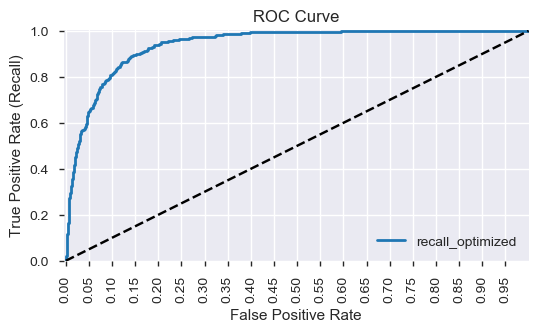

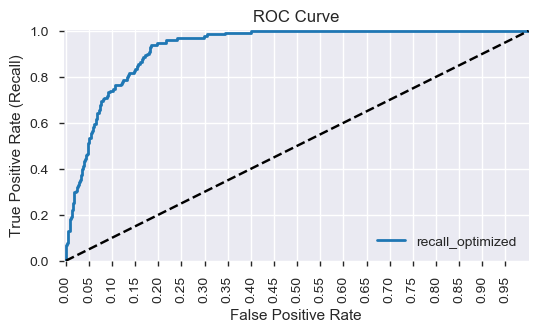

In [322]:
#All Columns
metrics_df = metrics_df.append(execute_model(LogisticRegression(), all_features, 'ALL'))

### 2. RandomForestClassifier

In [ ]:
#param_grid = {'n_estimators': [100,200,300]}
#rf_all_estimator = GridSearchCV(RandomForestClassifier(), param_grid, random_state = 42,
#                                          n_jobs=-1,
#                                          verbose=1)
#metrics_df = metrics_df.append(execute_model(rf_all_estimator, all_features, 'ALL'))

Training Features Shape: (2883, 42)
Training Labels Shape: (2883,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.0s finished


Model:  RandomForestClassifier
************************** Train **************************


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Train Accuracy : 100.0 %.
AUC : 100.0 %.
************************** Test **************************


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.2s finished


AUC : 92.82 %.


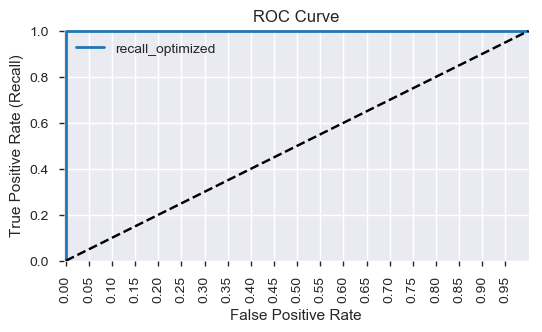

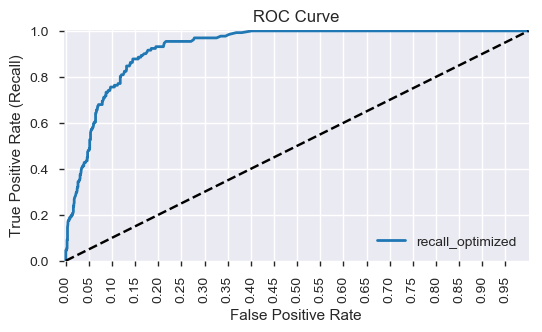

In [323]:
#All Columns
from  sklearn.ensemble import RandomForestClassifier
n_trees=500
rf_all_estimator = RandomForestClassifier(n_estimators=n_trees,
                                          random_state = 42,
                                          n_jobs=-1,
                                          verbose=1)
metrics_df = metrics_df.append(execute_model(rf_all_estimator, all_features, 'ALL'))

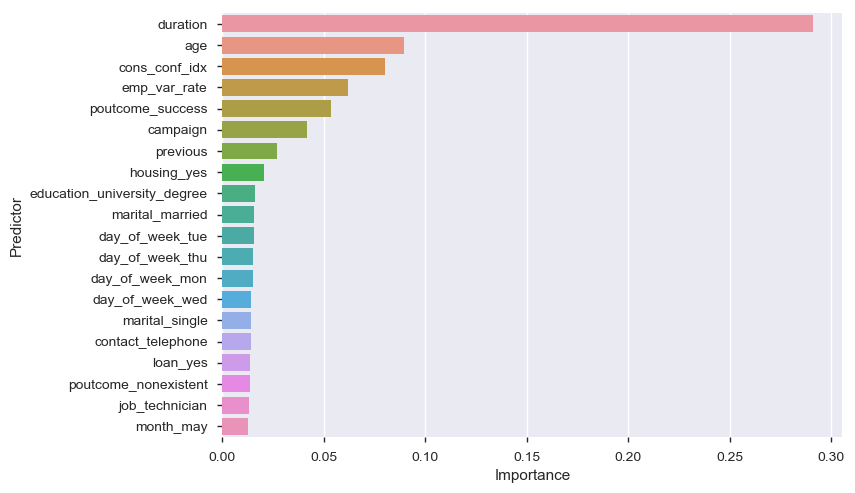

Random Forest Best features are:
 0                        duration
1                             age
2                   cons_conf_idx
3                    emp_var_rate
4                poutcome_success
5                        campaign
6                        previous
7                     housing_yes
8     education_university_degree
9                 marital_married
10                day_of_week_tue
11                day_of_week_thu
12                day_of_week_mon
13                day_of_week_wed
14                 marital_single
15              contact_telephone
16                       loan_yes
17           poutcome_nonexistent
18                 job_technician
19                      month_may
Name: Predictor, dtype: object


In [324]:
rf_features = find_best_features(rf_all_estimator, '', count=20,verbose=False)
print("Random Forest Best features are:\n",rf_features)

Training Features Shape: (2883, 20)
Training Labels Shape: (2883,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s


Model:  RandomForestClassifier
************************** Train **************************


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finished


Train Accuracy : 100.0 %.
AUC : 100.0 %.
************************** Test **************************


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.4s finished


AUC : 92.69 %.


,Model,Model_Name,Metric,Train_Test,Value,Features_used
1,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForestClassifier,AUC,Train,100.00,RF
0,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForestClassifier,AUC,Test,92.69,RF


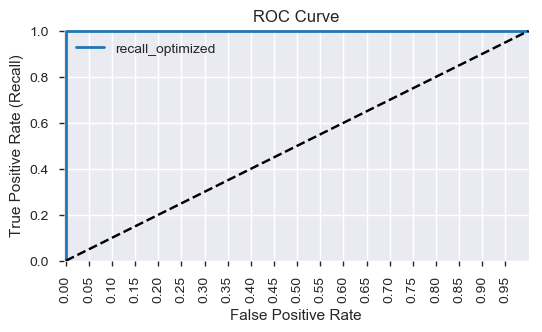

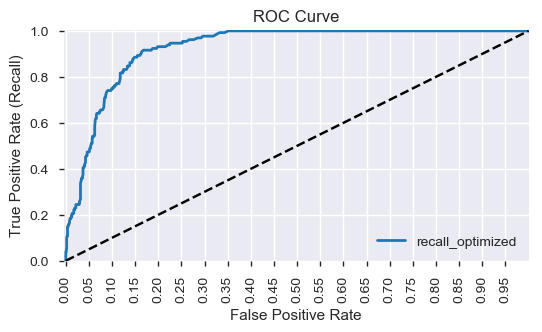

In [325]:
# Best features from Random Forest feature importance
estimator = RandomForestClassifier(n_estimators=n_trees,
                                   random_state = 42,
                                    n_jobs=-1,
                                    verbose=1)
execute_model(estimator, rf_features, 'RF')

### 3. XGBClassifier

In [326]:
from xgboost import XGBClassifier

Training Features Shape: (2883, 42)
Training Labels Shape: (2883,)
Model:  XGBClassifier
************************** Train **************************
Train Accuracy : 97.99 %.
AUC : 99.54 %.
************************** Test **************************
AUC : 93.06 %.


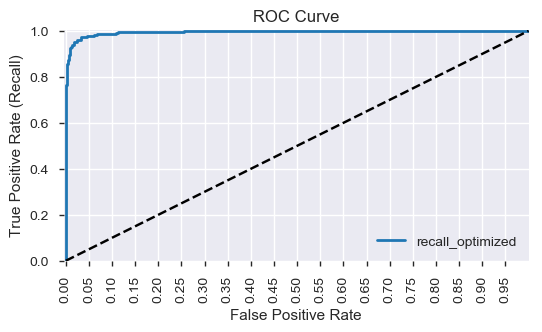

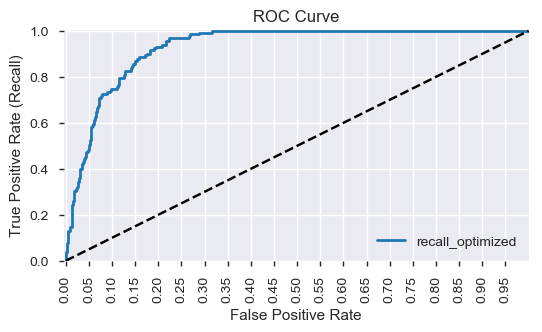

In [327]:
#All Columns
n_trees=500
xgb_estimator = XGBClassifier(n_estimators=n_trees,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)
metrics_df = metrics_df.append(execute_model(xgb_estimator, all_features, 'ALL'))

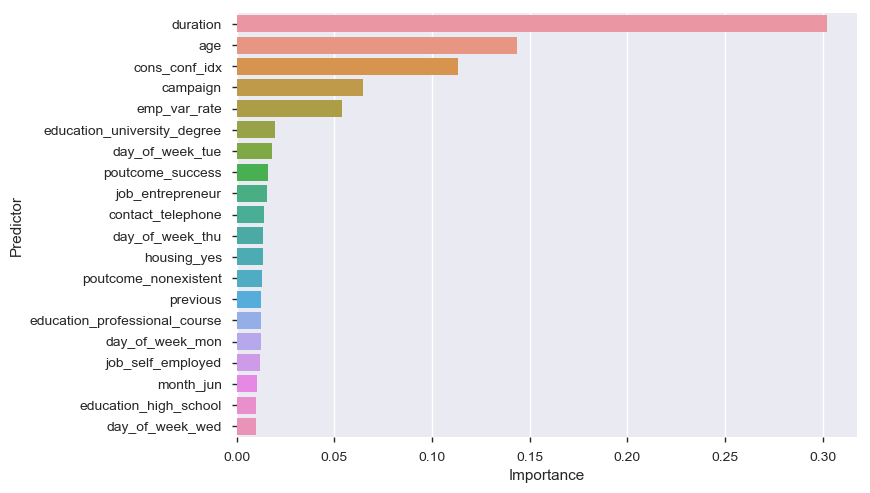

XGBoost Best features are:
 0                          duration
1                               age
2                     cons_conf_idx
3                          campaign
4                      emp_var_rate
5       education_university_degree
6                   day_of_week_tue
7                  poutcome_success
8                  job_entrepreneur
9                 contact_telephone
10                  day_of_week_thu
11                      housing_yes
12             poutcome_nonexistent
13                         previous
14    education_professional_course
15                  day_of_week_mon
16                job_self_employed
17                        month_jun
18            education_high_school
19                  day_of_week_wed
Name: Predictor, dtype: object


In [328]:
xgb_features = find_best_features(xgb_estimator, '', count=20,verbose=False)
print("XGBoost Best features are:\n",xgb_features)

Training Features Shape: (2883, 20)
Training Labels Shape: (2883,)
Model:  XGBClassifier
************************** Train **************************
Train Accuracy : 97.78 %.
AUC : 99.42 %.
************************** Test **************************
AUC : 92.74 %.


,Model,Model_Name,Metric,Train_Test,Value,Features_used
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,AUC,Train,99.42,XGB
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,AUC,Test,92.74,XGB


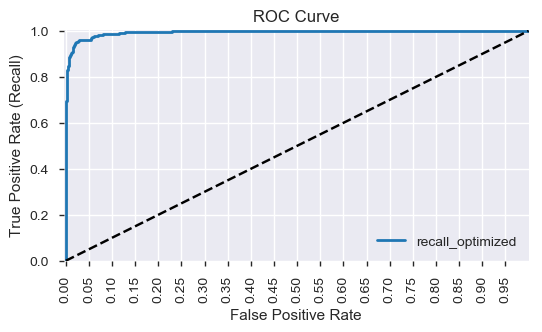

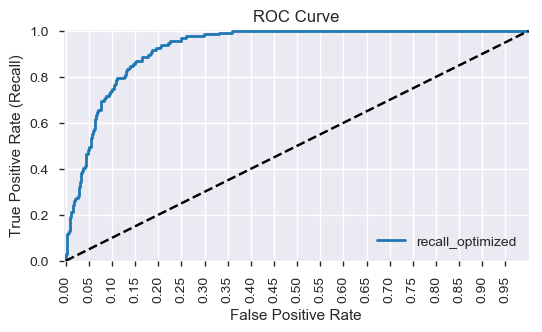

In [330]:
#Using XGBoost Columns
estimator = XGBClassifier(n_estimators=n_trees,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)
execute_model(estimator, xgb_features, 'XGB')

### Consolidate all the metrics

In [331]:
metrics_df

,Model,Model_Name,Metric,Train_Test,Value,Features_used
1,"LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,AUC,Train,94.11,ALL
0,"LogisticRegression(C=1.0, class_weight=None, d...",LogisticRegression,AUC,Test,92.73,ALL
1,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForestClassifier,AUC,Train,100.00,ALL
0,"(DecisionTreeClassifier(class_weight=None, cri...",RandomForestClassifier,AUC,Test,92.82,ALL
1,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,AUC,Train,99.54,ALL
0,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,AUC,Test,93.06,ALL


In [332]:
df = metrics_df[['Model_Name','Features_used','Metric', 'Train_Test','Value']]
df.set_index(['Model_Name','Features_used','Metric', 'Train_Test'],drop=True,inplace=True)
df.unstack()
df.unstack().to_csv("Metrics.csv")
df

Value
Model_Name             Features_used Metric Train_Test        
LogisticRegression     ALL           AUC    Train        94.11
                                            Test         92.73
RandomForestClassifier ALL           AUC    Train       100.00
                                            Test         92.82
XGBClassifier          ALL           AUC    Train        99.54
                                            Test         93.06

### Saving as pickle object

In [333]:
#Lets save everything in metrics_df to pickle object
import pickle

In [334]:
# now you can save it to a file
with open('metrics_df.pkl', 'wb') as f:
    pickle.dump(metrics_df, f)

In [ ]:
# and later you can load it
with open('metrics_df.pkl', 'rb') as f:
    metrics_df = pickle.load(f)